## Empirics -  Analysing Structured Data from Brazilian Federal Police Investigations

Here I analyse the data downlaaded from  http://apps.mpf.mp.br/aptusmpf/portal?servidor=portal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl

In [2]:
# Read the data framed archives:
#'C:/IP_DATA/INQ_DATA_ORIGINAL_HEADER_BACKUP.pkl' - As extracted from the Jsons
# All the fields can be extracted from raw data using the program : 'MPF_STRUCTURING_RAW_DATA.ipynb'
df = pd.read_pickle('C:/IP_DATA/INQ_DATA.pkl')

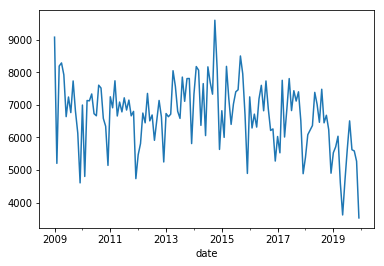

In [3]:
df =df.sort_index()
df = df.dropna()
df['2009':'2019'].resample('M').title.count().plot()

#plotiting all investigations monthly


In [4]:
#sample of the Dataset and Fields
df.head()

,offences,region,title
date,,,
2009-01-02,,SP,01.02.2009 - INQ 0000925-76.2011.4.03.6115 (JF...
2009-01-02,"SCI - Contrabando ou descaminho, 2ª CCR - Cont...",DF,"01.02.2009 - RPCR 2009.34.00.001017-0 (JF-DF, ..."
2009-01-02,,RJ,01.02.2009 - INQ 2009.51.01.490032-5 (JFRJ/ITA...
2009-01-03,"PFDC - DIREITO PENAL, 2ª CCR - DIREITO PENAL",RS,01.03.2009 - RPCR 2009.71.00.006470-8 (JFRS/PO...
2009-01-03,,RS,01.03.2009 - RPCR 2009.71.00.006473-3 (JFRS/PO...


In [5]:
#creat a series of other crimes
corruption = df.loc[df['offences'].str.contains( 'orrup') ==True]
embezzlement = df.loc[df['offences'].str.contains( 'ecula') ==True]
environmental = df.loc[df['offences'].str.contains( 'ambient') ==True]
desobedience = df.loc[df['offences'].str.contains( 'esobed') ==True]
extortive_corruption = df.loc[df['offences'].str.contains( 'oncuss') ==True]
swindle = df.loc[df['offences'].str.contains( 'stelionato') ==True]
theft= df.loc[df['offences'].str.contains( 'oubo|urto|o de domic') ==True]
drugs_related = df.loc[df['offences'].str.contains( 'rogas') ==True]
against_property = df.loc[df['offences'].str.contains( 'contra o Patri') ==True]
finance_related = df.loc[df['offences'].str.contains( 'Financeiro') ==True]
currency_falsification = df.loc[df['offences'].str.contains( 'Moeda Falsa') ==True]
fake_id = df.loc[df['offences'].str.contains( 'alsidade ide') ==True]
gun_restrictions = df.loc[df['offences'].str.contains( 'Armas') ==True]
authority_abuse = df.loc[df['offences'].str.contains( 'Abuso de Autoridade') ==True]
procurement_fraud = df.loc[df['offences'].str.contains( 'licita') ==True]
crimes_corruption = df.loc[df['offences'].str.contains('eculato|orrup|oncus' )==True]
other_crimes = df.loc[df['offences'].str.contains('eculato|orrup|oncus' )==False]

states = df.region.unique()
states = [x for x in states if str(x) != 'nan']

In [6]:
#test crimes corrutpion agains other crimes
print(len(other_crimes))
print(len(crimes_corruption))
print(len(df))
print(len(other_crimes) + len(crimes_corruption))

863345
22330
885675
885675


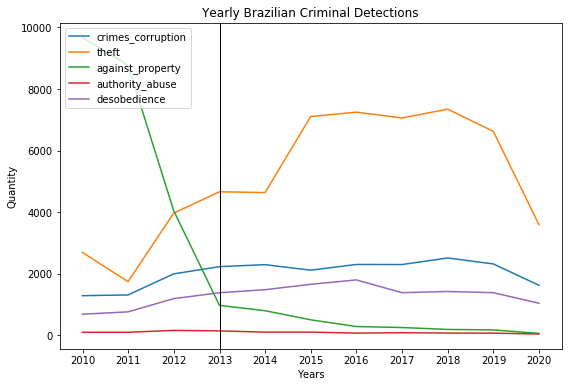

In [7]:
fig, ax = plt.subplots(figsize=(9,6))
crimes = [crimes_corruption,theft, against_property , authority_abuse, desobedience ]

ax.set(xlabel='Years', ylabel='Quantity',title='Yearly Brazilian Criminal Detections')
for i in crimes:
    ax.plot(i['2009':'2019'].resample('Y').title.count())
ax.axvline('2013', color='black', lw=1, alpha=1)    
ax.legend(['crimes_corruption','theft', 'against_property' , 'authority_abuse', 'desobedience' ],loc=2)
plt.show()

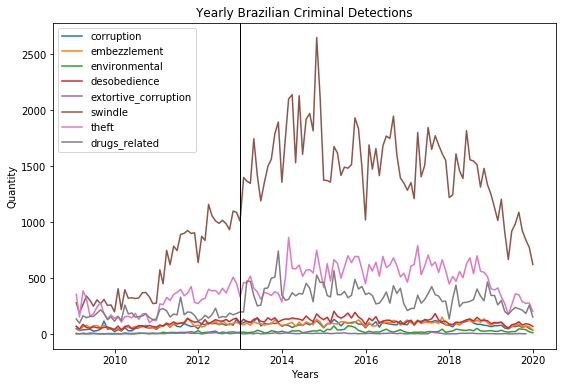

In [8]:
fig, ax = plt.subplots(figsize=(9,6))


ax.set(xlabel='Years', ylabel='Quantity',title='Yearly Brazilian Criminal Detections')
for i in [corruption, embezzlement, environmental, desobedience, extortive_corruption,swindle,theft, drugs_related]:
    ax.plot(i['2009':'2019'].resample('M').title.count())
ax.axvline('2013', color='black', lw=1, alpha=1)    
ax.legend(['corruption', 'embezzlement', 'environmental', 'desobedience', 'extortive_corruption','swindle','theft', 'drugs_related'],loc=2)
plt.show()

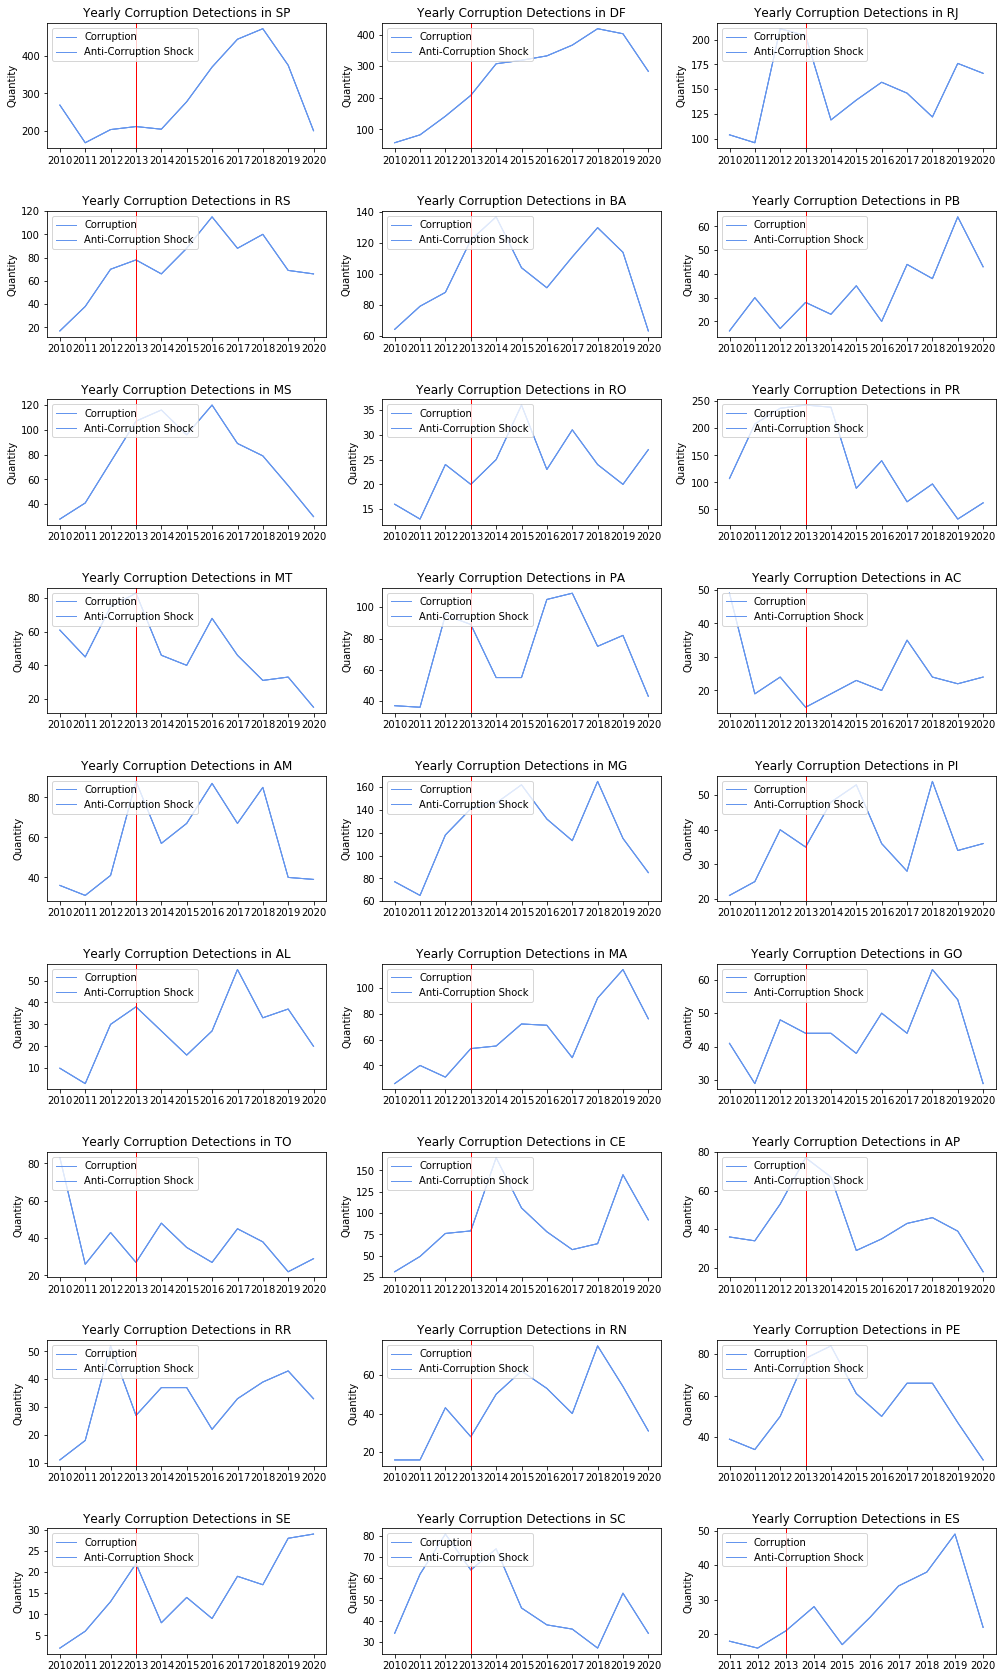

In [10]:
fig = plt.figure(figsize=(17,30))

fig.subplots_adjust(hspace = 0.5) # avoid x axis supperposition

for i in range(0,len(states),1):
    plt.subplot(int(len(states)/3),3,i+1)
    plt.plot((crimes_corruption['2009':'2019'].loc[crimes_corruption['2009':'2019']['region'].str.contains(states[i]) ==True].resample('Y').count()),color = 'cornflowerblue', lw = 1)
    plt.axvline('2013', color='red', lw=1, alpha=1)    
   # plt.xticks(np.arange(1,132,30))
    plt.legend(('Corruption','Anti-Corruption Shock'),loc=2)
    #plt.xlabel('Years')
    plt.ylabel('Quantity')
    plt.title('Yearly Corruption Detections in ' + states[i])
plt.show()
fig.savefig('states.pdf', transparent= True)

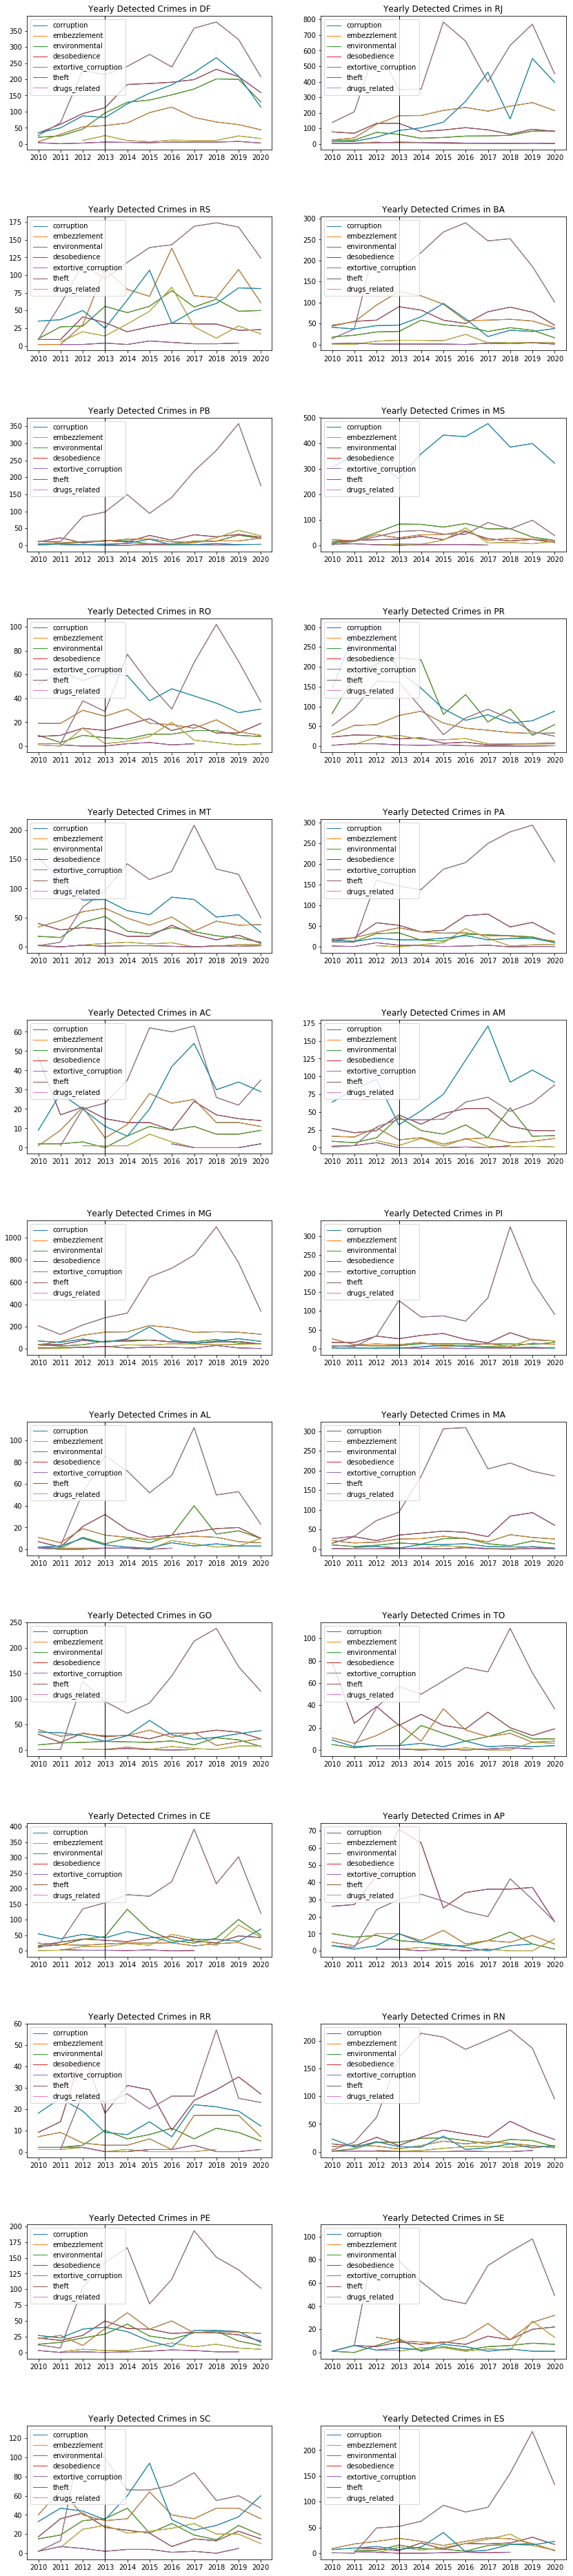

In [11]:
fig = plt.figure(figsize=(14,100))

fig.subplots_adjust(hspace = 0.5) # avoid x axis supperposition

for i in range(1,len(states),1):
    plt.subplot(19,2,i)
    for j in [corruption, embezzlement, environmental, desobedience, extortive_corruption,theft, drugs_related]:
        plt.plot(j['2009':'2019'].loc[j['2009':'2019']['region'].str.contains(states[i]) ==True].resample('Y').count(), lw = 1)
    plt.axvline('2013', color='black', lw=1, alpha=1)    
    #plt.xticks(np.arange(2009,2020,2000))
    plt.legend(['corruption', 'embezzlement', 'environmental', 'desobedience', 'extortive_corruption','theft', 'drugs_related'],loc=2)
    plt.title('Yearly Detected Crimes in ' +  (states[i]) )
plt.show()

In [12]:
print(len(corruption))
print(len(crimes_corruption))
print(len(embezzlement))

10561
22330
11612


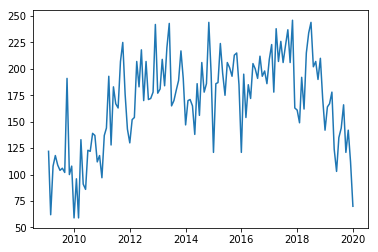

In [13]:
#Ploting all crimes monthly

plt.plot(crimes_corruption['2009':'2019'].resample('M').title.count())

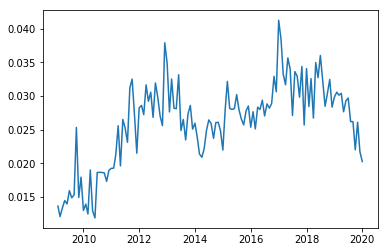

In [20]:
#Ploting proportion of corruption crimes related to all crimes monthly

plt.plot(crimes_corruption['2009':'2019'].resample('M').title.count()/other_crimes['2009':'2019'].resample('M').title.count())

In [14]:
test1 = crimes_corruption['2009':'2019'].resample('Y').title.count() / (df['2009':'2019'].resample('Y').title.count() - crimes_corruption['2009':'2019'].resample('Y').title.count())
test2 = crimes_corruption['2009':'2019'].resample('M').title.count() / (df['2009':'2019'].resample('M').title.count() - crimes_corruption['2009':'2019'].resample('M').title.count())
test3 = crimes_corruption['2009':'2019'].resample('D').title.count() / (df['2009':'2019'].resample('D').title.count() - crimes_corruption['2009':'2019'].resample('D').title.count())

# Empirical Strategy

1 - Based on Miller (2009), I'll try to fit a polinomial curve after the relevant schok.
2 - Try different regression discontinuities: one after the schock , other after the 'clean up'. 
3 - Run the data searching for 'chow-like' breaks on the trend.

## 1 - Corruption Deterrence Empirical Model


Following Berlin, Qin and Spagnolo (2018) , a possible OLS regression (Poisson Regression) using feasible data from the Brazilian Federal Police of initiated investigations of corruption as dependent variable $Y$ can be expressed by:

$$Y_{t}=\beta_{0}+\beta_1 D_t+ \beta _2 T1^{n}_{t}+ \beta _3 T2^{n}_{t} + \beta_4 X_{t} + \varepsilon_{t}$$

For,

$t$= Month after January 2009; and 

$n$= Order of the intended tested polynomial.


Where

$Y_{t}$= Number of initiated investigations for corruption crimes (Or corruption Related Crimes);

$D_t$= Dummy for the impact of the enforcements, being 0 before August 2013 and 1 after;

$T1$= Time effect of all sample. Being 1 at the first observation 2 at the next and so on;

$T2$= Time effect from the beginning of the enforcement shock. Being 1 after august 2013, 2 in the next month and so on; and

$\varepsilon_{it}$= Is the error from functional predictions, it is expected to be normally distributed and i.i.d.


In order to test different shaped polynomials that might fit the expected detection curve,  the variables $T1$ and $T2$ can be tested on different order polynomials to check different goodness of fit.

In [7]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.summary2 import summary_col

from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

In [8]:
#Yearly Variables
#Creating the yearly dataframe 
ydf = df['2009':'2019'].resample('Y').count()


#In the absence of a better solution to unstring the variables:
scrimes = ['corruption', 'embezzlement', 'environmental',' desobedience', 'extortive_corruption','swindle','theft',
          'drugs_related', 'against_property', 'finance_related',' currency_falsification',' fake_id', 'gun_restrictions',
          'authority_abuse', 'procurement_fraud', 'crimes_corruption','other_crimes']
crimes = [corruption, embezzlement, environmental, desobedience, extortive_corruption,swindle,theft,
          drugs_related, against_property, finance_related, currency_falsification, fake_id, gun_restrictions,
          authority_abuse, procurement_fraud, crimes_corruption, other_crimes]


for i , j  in zip(crimes, scrimes):
    ydf[j] = i.resample('Y').title.count()
    ydf[j] = ydf[j]/ydf[j][0]


ydf['ycons'] = 1 


# creat a dummy with 0 before 2013 and 1 after #
ydummy = []   
for i in (range(2008,2019)):
    if i < 2014:
        ydummy.append(0)
    else:
        ydummy.append(1)
        
ydf['ydummy'] = ydummy
ydf['year'] = range(2009,2020,1)
# creat a list of 1 to 13#
yt1 = list(range(1,12)) 

ydf['yt1'] = yt1


# creat a polynom root after 2013#
yt2= []                  # creat a polynom root after 2013#
for i in (range(2008,2019)):
    if i < 2014:
        yt2.append(0)
    else:
        yt2.append(i-2014)
ydf['yt2'] = yt2
        
# Creating the higher order polynoms       
        
ydf['yt1'] = yt1         
ydf['ys1'] = np.power(yt1,2)
ydf['yc1'] = np.power(yt1,3)
ydf['ys2'] = np.power(yt2,2)
ydf['yc2'] = np.power(yt2,3)


In [17]:
#CORRUPTION ONLY
results1 = sm.OLS(ydf['corruption'], ydf[['ycons','ydummy']]).fit()
results2 = sm.OLS(ydf['corruption'], ydf[['ycons','ydummy','yt1','yt2']]).fit()
results3 = sm.OLS(ydf['corruption'], ydf[['ycons','ydummy','yt1','yt2','ys1','ys2']]).fit()
results4 = sm.OLS(ydf['corruption'], ydf[['ycons','ydummy','yt1','yt2','ys1','ys2','yc1','yc2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4])
stargazer.covariate_order(['ycons','ydummy','yt1','yt2','ys1','ys2','yc1','yc2'])
HTML(stargazer.render_html())

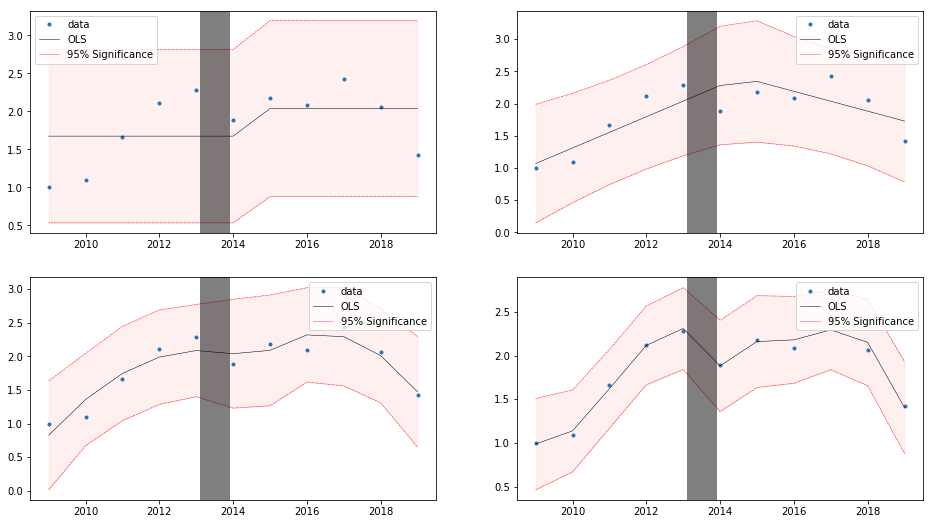

In [18]:

fig = plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
prstd1, iv_l, iv_u = wls_prediction_std(results1)
plt.plot(ydf['year'], ydf['corruption'], '.',lw=1)
plt.plot(ydf['year'], results1.fittedvalues, 'k-', lw=0.5)
plt.plot(ydf['year'], iv_u, 'r----', lw=0.5)
plt.plot(ydf['year'], iv_l, 'r----', lw=0.5)
theta = 2013.5
plt.axvline(theta, color='black', lw=30, alpha=0.5)
plt.fill_between(ydf['year'], iv_u,iv_l, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc=2);


plt.subplot(2,2,2)
prstd1, iv_l2, iv_u2 = wls_prediction_std(results2)
plt.plot(ydf['year'], ydf['corruption'], '.',lw=1)
plt.plot(ydf['year'], results2.fittedvalues, 'k-', lw=0.5)
plt.plot(ydf['year'], iv_u2, 'r----', lw=0.5)
plt.plot(ydf['year'], iv_l2, 'r----', lw=0.5)
theta = 2013.5
plt.axvline(theta, color='black', lw=30, alpha=0.5)
plt.fill_between(ydf['year'], iv_u2,iv_l2, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='upper right');



plt.subplot(2,2,3)
prstd1, iv_l3, iv_u3 = wls_prediction_std(results3)
plt.plot(ydf['year'], ydf['corruption'], '.',lw=1)
plt.plot(ydf['year'], results3.fittedvalues, 'k-', lw=0.5)
plt.plot(ydf['year'], iv_u3, 'r----', lw=0.5)
plt.plot(ydf['year'], iv_l3, 'r----', lw=0.5)
theta = 2013.5
plt.axvline(theta, color='black', lw=30, alpha=0.5)
plt.fill_between(ydf['year'], iv_u3,iv_l3, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='upper right');

plt.subplot(2,2,4)
prstd1, iv_l4, iv_u4 = wls_prediction_std(results4)
plt.plot(ydf['year'], ydf['corruption'], '.',lw=1)
plt.plot(ydf['year'], results4.fittedvalues, 'k-', lw=0.5)
plt.plot(ydf['year'], iv_u4, 'r----', lw=0.5)
plt.plot(ydf['year'], iv_l4, 'r----', lw=0.5)
theta = 2013.5
plt.axvline(theta, color='black', lw=30, alpha=0.5)
plt.fill_between(ydf['year'], iv_u4,iv_l4, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='upper right');

plt.show()

fig.savefig('emp2.pdf')

In [19]:
#CORRUPTION CRIMES
results1 = sm.OLS(ydf['crimes_corruption'], ydf[['ycons','ydummy']]).fit()
results2 = sm.OLS(ydf['crimes_corruption'], ydf[['ycons','ydummy','yt1','yt2']]).fit()
results3 = sm.OLS(ydf['crimes_corruption'], ydf[['ycons','ydummy','yt1','yt2','ys1','ys2']]).fit()
results4 = sm.OLS(ydf['crimes_corruption'], ydf[['ycons','ydummy','yt1','yt2','ys1','ys2','yc1','yc2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4])
stargazer.covariate_order(['ycons','ydummy','yt1','yt2','ys1','ys2','yc1','yc2'])
HTML(stargazer.render_html())

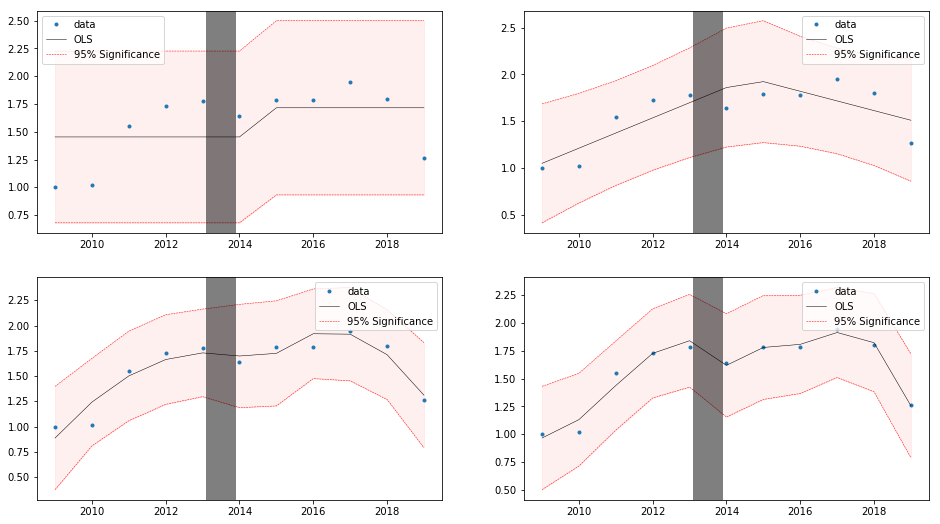

In [20]:

fig = plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
prstd1, iv_l, iv_u = wls_prediction_std(results1)
plt.plot(ydf['year'], ydf['crimes_corruption'], '.',lw=1)
plt.plot(ydf['year'], results1.fittedvalues, 'k-', lw=0.5)
plt.plot(ydf['year'], iv_u, 'r----', lw=0.5)
plt.plot(ydf['year'], iv_l, 'r----', lw=0.5)
theta = 2013.5
plt.axvline(theta, color='black', lw=30, alpha=0.5)
plt.fill_between(ydf['year'], iv_u,iv_l, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc=2);


plt.subplot(2,2,2)
prstd1, iv_l2, iv_u2 = wls_prediction_std(results2)
plt.plot(ydf['year'], ydf['crimes_corruption'], '.',lw=1)
plt.plot(ydf['year'], results2.fittedvalues, 'k-', lw=0.5)
plt.plot(ydf['year'], iv_u2, 'r----', lw=0.5)
plt.plot(ydf['year'], iv_l2, 'r----', lw=0.5)
theta = 2013.5
plt.axvline(theta, color='black', lw=30, alpha=0.5)
plt.fill_between(ydf['year'], iv_u2,iv_l2, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='upper right');



plt.subplot(2,2,3)
prstd1, iv_l3, iv_u3 = wls_prediction_std(results3)
plt.plot(ydf['year'], ydf['crimes_corruption'], '.',lw=1)
plt.plot(ydf['year'], results3.fittedvalues, 'k-', lw=0.5)
plt.plot(ydf['year'], iv_u3, 'r----', lw=0.5)
plt.plot(ydf['year'], iv_l3, 'r----', lw=0.5)
theta = 2013.5
plt.axvline(theta, color='black', lw=30, alpha=0.5)
plt.fill_between(ydf['year'], iv_u3,iv_l3, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='upper right');

plt.subplot(2,2,4)
prstd1, iv_l4, iv_u4 = wls_prediction_std(results4)
plt.plot(ydf['year'], ydf['crimes_corruption'], '.',lw=1)
plt.plot(ydf['year'], results4.fittedvalues, 'k-', lw=0.5)
plt.plot(ydf['year'], iv_u4, 'r----', lw=0.5)
plt.plot(ydf['year'], iv_l4, 'r----', lw=0.5)
theta = 2013.5
plt.axvline(theta, color='black', lw=30, alpha=0.5)
plt.fill_between(ydf['year'], iv_u4,iv_l4, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='upper right');

plt.show()

fig.savefig('emp2.pdf')

In [9]:
#Monthly

mdf = df['2009':'2019'].resample('M').count()

#mdf['mdate'] = pd.date_range(start='1/1/2009', end='1/1/2020', freq='M')  

mdf['mcons'] = 1


#In the absence of a better solution to unstring the variables:
scrimes = ['corruption', 'embezzlement', 'environmental',' desobedience', 'extortive_corruption','swindle','theft',
          'drugs_related', 'against_property', 'finance_related',' currency_falsification',' fake_id', 'gun_restrictions',
          'authority_abuse', 'procurement_fraud', 'crimes_corruption','other_crimes']
crimes = [corruption, embezzlement, environmental, desobedience, extortive_corruption,swindle,theft,
          drugs_related, against_property, finance_related, currency_falsification, fake_id, gun_restrictions,
          authority_abuse, procurement_fraud, crimes_corruption, other_crimes]


for i , j  in zip(crimes, scrimes):
    mdf[j] = i['2009':'2019'].resample('M').title.count()
    mdf[j] = mdf[j]/mdf[j][0]


# creat a dummy with 0 before aug 2013 (69 months) and 1 after #
mdummy = []    
for i in (range(1,len(mdf)+1)):
    if i < 55:
        mdummy.append(0)
    else:
        mdummy.append(1)
        
mdf['mdummy'] = mdummy

# creat a list of 1 to 13#
mt1 = list(range(1,len(mdf)+1))  

mdf['mt1'] = mt1

# creat a polynom root after 2013#
mt2= []                  
for i in (range(1,len(mdf)+1)):
    if i < 55:
        mt2.append(0)
    else:
        mt2.append(i-55+1)
        
mdf['mt2'] = mt2

#Creating other orther polynomials
        
mdf['ms1'] = np.power(mt1,2)
mdf['mc1'] = np.power(mt1,3)
mdf['ms2'] = np.power(mt2,2)
mdf['mc2'] = np.power(mt2,3)
mdf['mq1'] = np.power(mt1,4)
mdf['mf1'] = np.power(mt1,5)
mdf['mq2'] = np.power(mt2,4)
mdf['mf2'] = np.power(mt2,5)


In [33]:
#  Corruption 
results1 = sm.OLS(mdf['other_crimes'], mdf[['mcons','mdummy']]).fit()
results2 = sm.OLS(mdf['other_crimes'], mdf[['mcons','mdummy','mt1','mt2']]).fit()
results3 = sm.OLS(mdf['other_crimes'], mdf[['mcons','mdummy','mt1','mt2','ms1','ms2']]).fit()
results4 = sm.OLS(mdf['other_crimes'], mdf[['mcons','mdummy','mt1','mt2','ms1','ms2','mc1','mc2']]).fit()
results5 = sm.OLS(mdf['other_crimes'], mdf[['mcons','mdummy','mt2','ms2','mc2','mq2']]).fit()
results6 = sm.OLS(mdf['other_crimes'], mdf[['mcons','mdummy','mt2','ms2','mc2','mq2','mf2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4,results5,results6])
stargazer.covariate_order(['mcons','mdummy',])
HTML(stargazer.render_html())

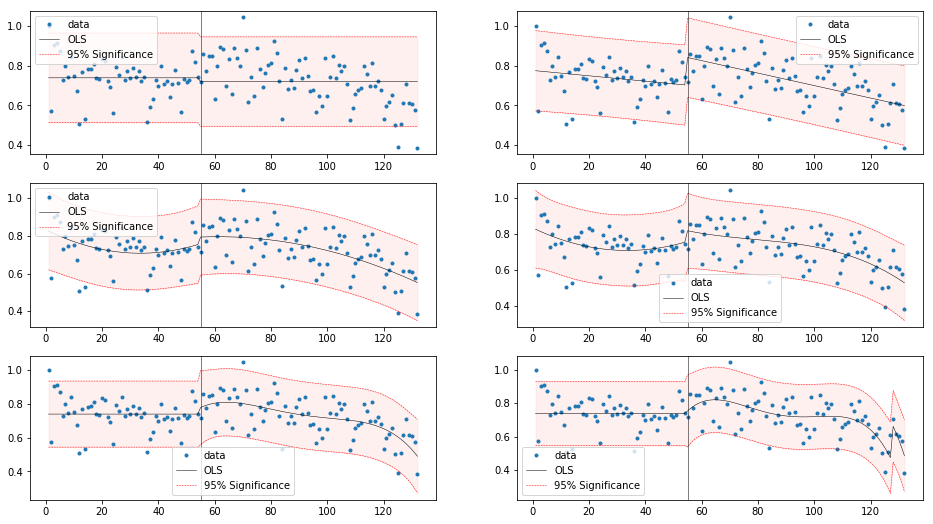

In [35]:

fig = plt.figure(figsize=(16,9))

plt.subplot(3,2,1)
prstd1, iv_l1, iv_u1 = wls_prediction_std(results1)
plt.plot( mdf['mt1'], mdf['other_crimes'], '.',lw=1)
plt.plot(mdf['mt1'],results1.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1'], iv_u1, 'r----', lw=0.5)
plt.plot( mdf['mt1'],iv_l1, 'r----', lw=0.5)
theta = 55
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between( mdf['mt1'],iv_u1,iv_l1, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc=2);


plt.subplot(3,2,2)
prstd1, iv_l2, iv_u2 = wls_prediction_std(results2)
plt.plot(mdf['mt1'], mdf['other_crimes'], '.',lw=1)
plt.plot(mdf['mt1'], results2.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1'], iv_u2, 'r----', lw=0.5)
plt.plot(mdf['mt1'], iv_l2, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between( mdf['mt1'],iv_u2,iv_l2, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');



plt.subplot(3,2,3)
prstd1, iv_l3, iv_u3 = wls_prediction_std(results3)
plt.plot(mdf['mt1'], mdf['other_crimes'], '.',lw=1)
plt.plot(mdf['mt1'], results3.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1'], iv_u3, 'r----', lw=0.5)
plt.plot(mdf['mt1'], iv_l3, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf['mt1'],iv_u3,iv_l3, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='upper left');

plt.subplot(3,2,4)
prstd1, iv_l4, iv_u4 = wls_prediction_std(results4)
plt.plot(mdf['mt1'], mdf['other_crimes'], '.',lw=1)
plt.plot(mdf['mt1'], results4.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1'], iv_u4, 'r----', lw=0.5)
plt.plot(mdf['mt1'], iv_l4, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf['mt1'], iv_u4,iv_l4, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');


plt.subplot(3,2,5)
prstd1, iv_l5, iv_u5 = wls_prediction_std(results5)
plt.plot(mdf['mt1'], mdf['other_crimes'], '.',lw=1)
plt.plot(mdf['mt1'], results5.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1'], iv_u5, 'r----', lw=0.5)
plt.plot(mdf['mt1'], iv_l5, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf['mt1'], iv_u5,iv_l5, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');


plt.subplot(3,2,6)
prstd1, iv_l6, iv_u6 = wls_prediction_std(results6)
plt.plot(mdf['mt1'], mdf['other_crimes'], '.',lw=1)
plt.plot(mdf['mt1'], results6.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1'], iv_u6, 'r----', lw=0.5)
plt.plot(mdf['mt1'], iv_l6, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf['mt1'], iv_u6,iv_l6, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');



plt.show()

fig.savefig('emp3.pdf')

In [51]:
#  Corruption 
results1 = sm.Poisson(mdf['crimes_corruption'], mdf[['mcons','mdummy']]).fit()
results2 = sm.Poisson(mdf['crimes_corruption'], mdf[['mcons','mdummy','mt1','mt2']]).fit()
results3 = sm.Poisson(mdf['crimes_corruption'], mdf[['mcons','mdummy','mt1','mt2','ms1','ms2']]).fit()
results4 = sm.Poisson(mdf['crimes_corruption'], mdf[['mcons','mdummy','mt1','mt2','ms1','ms2','mc1','mc2']]).fit()
results5 = sm.Poisson(mdf['crimes_corruption'], mdf[['mcons','mdummy','mt2','ms2','mc2','mq2']]).fit()
results6 = sm.Poisson(mdf['crimes_corruption'], mdf[['mcons','mdummy','mt2','ms2','mc2','mq2','mf2']]).fit()
print(results1.summary())
print(results2.summary())
print(results3.summary())
print(results4.summary())
print(results5.summary())
print(results6.summary())

Optimization terminated successfully.
         Current function value: 1.168340
         Iterations 4
Optimization terminated successfully.
         Current function value: 1.152732
         Iterations 5
         Current function value: 356196181866940396500981488267086364636717514752.000000
         Iterations: 35
Optimization terminated successfully.
         Current function value: nan
         Iterations 1
Optimization terminated successfully.
         Current function value: nan
         Iterations 1
Optimization terminated successfully.
         Current function value: nan
         Iterations 1
                          Poisson Regression Results                          
Dep. Variable:      crimes_corruption   No. Observations:                  132
Model:                        Poisson   Df Residuals:                      130
Method:                           MLE   Df Model:                            1
Date:                Sun, 01 Mar 2020   Pseudo R-squ.:                0.0059

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1221: RuntimeWarning: overflow encountered in multiply
  return -np.dot(L*X.T, X)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_discrete_distns.py:493: RuntimeWarning: invalid value encountered in greater_equal
  return mu >= 0
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:271: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (

In [17]:
#  Corruption 
results1 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy']]).fit()
results2 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mt1','mt2']]).fit()
results3 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mt1','mt2','ms1','ms2']]).fit()
results4 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mt1','mt2','ms1','ms2','mc1','mc2']]).fit()
results5 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mt2','ms2','mc2']]).fit()
results6 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mt2','ms2','mc2','mq2','mf2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4,results5,results6])
stargazer.covariate_order(['mcons','mdummy','mt1','mt2'])
HTML(stargazer.render_html())

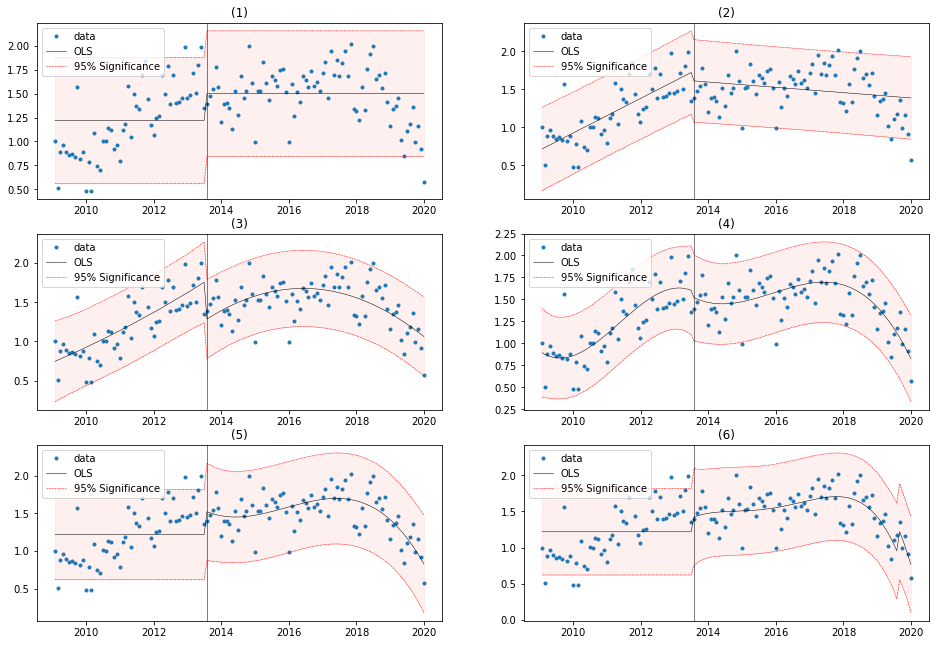

In [18]:

fig = plt.figure(figsize=(16,11))

plt.subplot(3,2,1)
prstd1, iv_l1, iv_u1 = wls_prediction_std(results1)
plt.plot(mdf.index, mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf.index,results1.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf.index, iv_u1, 'r----', lw=0.5)
plt.plot(mdf.index,iv_l1, 'r----', lw=0.5)

theta = '2013-08-01'
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf.index, iv_u1,iv_l1, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc=2);
plt.title('(1)')

plt.subplot(3,2,2)
prstd1, iv_l2, iv_u2 = wls_prediction_std(results2)
plt.plot(mdf.index, mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf.index, results2.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf.index, iv_u2, 'r----', lw=0.5)
plt.plot(mdf.index, iv_l2, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between( mdf.index,iv_u2,iv_l2, color='red', alpha='0.06')
plt.title('(2)')
plt.legend(('data','OLS','95% Significance'),loc=2);



plt.subplot(3,2,3)
prstd1, iv_l3, iv_u3 = wls_prediction_std(results3)
plt.plot(mdf.index, mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf.index, results3.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf.index, iv_u3, 'r----', lw=0.5)
plt.plot(mdf.index, iv_l3, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf.index,iv_u3,iv_l3, color='red', alpha='0.06')
plt.title('(3)')
plt.legend(('data','OLS','95% Significance'),loc=2);

plt.subplot(3,2,4)
prstd1, iv_l4, iv_u4 = wls_prediction_std(results4)
plt.plot(mdf.index, mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf.index, results4.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf.index, iv_u4, 'r----', lw=0.5)
plt.plot(mdf.index, iv_l4, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf.index, iv_u4,iv_l4, color='red', alpha='0.06')
plt.title('(4)')
plt.legend(('data','OLS','95% Significance'),loc=2);


plt.subplot(3,2,5)
prstd1, iv_l5, iv_u5 = wls_prediction_std(results5)
plt.plot(mdf.index, mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf.index, results5.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf.index, iv_u5, 'r----', lw=0.5)
plt.plot(mdf.index, iv_l5, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf.index, iv_u5,iv_l5, color='red', alpha='0.06')
plt.title('(5)')
plt.legend(('data','OLS','95% Significance'),loc=2);

plt.subplot(3,2,6)
prstd1, iv_l6, iv_u6 = wls_prediction_std(results6)
plt.plot(mdf.index, mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf.index, results6.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf.index, iv_u6, 'r----', lw=0.5)
plt.plot(mdf.index, iv_l6, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf.index, iv_u6,iv_l6, color='red', alpha='0.06')
plt.title('(6)')
plt.legend(('data','OLS','95% Significance'),loc=2);



plt.show()

fig.savefig('dis1.pdf')

In [46]:
#  Corruption 
results1 = sm.OLS(mdf['crimes_corruption']['2010':'2019'], mdf[['mcons','mdummy']]['2010':'2019']).fit()
results2 = sm.OLS(mdf['crimes_corruption']['2010':'2019'], mdf[['mcons','mdummy','mt1','mt2']]['2010':'2019']).fit()
results3 = sm.OLS(mdf['crimes_corruption']['2010':'2019'], mdf[['mcons','mdummy','mt1','mt2','ms1','ms2']]['2010':'2019']).fit()
results4 = sm.OLS(mdf['crimes_corruption']['2010':'2019'], mdf[['mcons','mdummy','mt1','mt2','ms1','ms2','mc1','mc2']]['2010':'2019']).fit()
results5 = sm.OLS(mdf['crimes_corruption']['2010':'2019'], mdf[['mcons','mdummy','mt2','ms2','mc2','mq2']]['2010':'2019']).fit()
results6 = sm.OLS(mdf['crimes_corruption']['2010':'2019'], mdf[['mcons','mdummy','mt2','ms2','mc2','mq2','mf2']]['2010':'2019']).fit()
stargazer = Stargazer([results1, results2,results3,results4,results5,results6])
stargazer.covariate_order(['mcons','mdummy'])
HTML(stargazer.render_html())

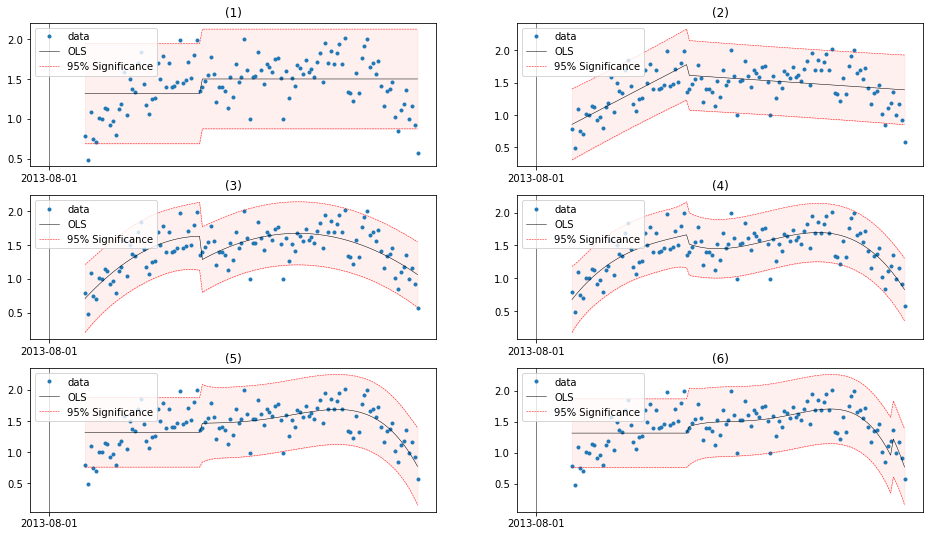

In [49]:

fig = plt.figure(figsize=(16,9))

plt.subplot(3,2,1)
prstd1, iv_l1, iv_u1 = wls_prediction_std(results1)
plt.plot(mdf['mt1']['2010':'2019'], mdf['crimes_corruption']['2010':'2019'], '.',lw=1)
plt.plot(mdf['mt1']['2010':'2019'],results1.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1']['2010':'2019'], iv_u1, 'r----', lw=0.5)
plt.plot(mdf['mt1']['2010':'2019'],iv_l1, 'r----', lw=0.5)

theta = '2013-08-01'
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf['mt1']['2010':'2019'], iv_u1,iv_l1, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc=2);
plt.title('(1)')

plt.subplot(3,2,2)
prstd1, iv_l2, iv_u2 = wls_prediction_std(results2)
plt.plot(mdf['mt1']['2010':'2019'], mdf['crimes_corruption']['2010':'2019'], '.',lw=1)
plt.plot(mdf['mt1']['2010':'2019'], results2.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1']['2010':'2019'], iv_u2, 'r----', lw=0.5)
plt.plot(mdf['mt1']['2010':'2019'], iv_l2, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf['mt1']['2010':'2019'],iv_u2,iv_l2, color='red', alpha='0.06')
plt.title('(2)')
plt.legend(('data','OLS','95% Significance'),loc=2);



plt.subplot(3,2,3)
prstd1, iv_l3, iv_u3 = wls_prediction_std(results3)
plt.plot(mdf['mt1']['2010':'2019'], mdf['crimes_corruption']['2010':'2019'], '.',lw=1)
plt.plot(mdf['mt1']['2010':'2019'], results3.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1']['2010':'2019'], iv_u3, 'r----', lw=0.5)
plt.plot(mdf['mt1']['2010':'2019'], iv_l3, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf['mt1']['2010':'2019'],iv_u3,iv_l3, color='red', alpha='0.06')
plt.title('(3)')
plt.legend(('data','OLS','95% Significance'),loc=2);

plt.subplot(3,2,4)
prstd1, iv_l4, iv_u4 = wls_prediction_std(results4)
plt.plot(mdf['mt1']['2010':'2019'], mdf['crimes_corruption']['2010':'2019'], '.',lw=1)
plt.plot(mdf['mt1']['2010':'2019'], results4.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1']['2010':'2019'], iv_u4, 'r----', lw=0.5)
plt.plot(mdf['mt1']['2010':'2019'], iv_l4, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf['mt1']['2010':'2019'], iv_u4,iv_l4, color='red', alpha='0.06')
plt.title('(4)')
plt.legend(('data','OLS','95% Significance'),loc=2);


plt.subplot(3,2,5)
prstd1, iv_l5, iv_u5 = wls_prediction_std(results5)
plt.plot(mdf['mt1']['2010':'2019'], mdf['crimes_corruption']['2010':'2019'], '.',lw=1)
plt.plot(mdf['mt1']['2010':'2019'], results5.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1']['2010':'2019'], iv_u5, 'r----', lw=0.5)
plt.plot(mdf['mt1']['2010':'2019'], iv_l5, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf['mt1']['2010':'2019'], iv_u5,iv_l5, color='red', alpha='0.06')
plt.title('(5)')
plt.legend(('data','OLS','95% Significance'),loc=2);

plt.subplot(3,2,6)
prstd1, iv_l6, iv_u6 = wls_prediction_std(results6)
plt.plot(mdf['mt1']['2010':'2019'], mdf['crimes_corruption']['2010':'2019'], '.',lw=1)
plt.plot(mdf['mt1']['2010':'2019'], results6.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1']['2010':'2019'], iv_u6, 'r----', lw=0.5)
plt.plot(mdf['mt1']['2010':'2019'], iv_l6, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf['mt1']['2010':'2019'], iv_u6,iv_l6, color='red', alpha='0.06')
plt.title('(6)')
plt.legend(('data','OLS','95% Significance'),loc=2);



plt.show()

fig.savefig('dis1.pdf')

In [36]:
#daily

ddf = df['2009-01-04':'2019-12-20'].resample('D').count()


ddf.dropna()

#mdf['mdate'] = pd.date_range(start='1/1/2009', end='1/1/2020', freq='M')  

ddf['dcons'] = 1

ddf['crimes_corruption'] = crimes_corruption['2009-01-04':'2019-12-20'].resample('D').title.count()
ddf['corruption'] = corruption['2009-01-04':'2019-12-20'].resample('D').title.count()
ddf['embezzlement'] = embezzlement['2009-01-04':'2019-12-20'].resample('D').title.count()
ddf['environmental'] = environmental['2009-01-04':'2019-12-20'].resample('D').title.count()
ddf['extortive_corruption'] = extortive_corruption['2009-01-04':'2019-12-20'].resample('D').title.count()



# creat a dummy with 0 before aug 2013 (69 months) and 1 after #
ddummy = []    
for i in (range(1,len(ddf)+1)):
    if i < 2070:
        ddummy.append(0)
    else:
        ddummy.append(1)
        
ddf['ddummy'] = ddummy

# creat a list of 1 to 13#
dt1 = list(range(1,len(ddf)+1))  

ddf['dt1'] = dt1

# creat a polynom root after 2013#
dt2= []                  
for i in (range(1,len(ddf)+1)):
    if i < 2070:
        dt2.append(0)
    else:
        dt2.append(i-2070+1)
        
ddf['dt2'] = dt2

#Creating other orther polynomials
        
ddf['ds1'] = np.power(dt1,2)
ddf['dc1'] = np.power(dt1,3)
ddf['ds2'] = np.power(dt2,2)
ddf['dc2'] = np.power(dt2,3)



In [37]:
#  Corruption 
for i in range(1,len(ddf)):
    if ddf['crimes_corruption'][i] > 30:
        ddf['crimes_corruption'][i] = 25
    else:
        pass

results1 = sm.OLS(ddf['crimes_corruption'], ddf[['dcons','ddummy']]).fit()
results2 = sm.OLS(ddf['crimes_corruption'], ddf[['dcons','ddummy','dt1','dt2']]).fit()
results3 = sm.OLS(ddf['crimes_corruption'], ddf[['dcons','ddummy','dt1','dt2','ds1','ds2']]).fit()
results4 = sm.OLS(ddf['crimes_corruption'], ddf[['dcons','ddummy','dt1','dt2','ds1','ds2','dc1','dc2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4])
stargazer.covariate_order(['dcons','ddummy','dt1','dt2','ds1','ds2','dc1','dc2'])
HTML(stargazer.render_html())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


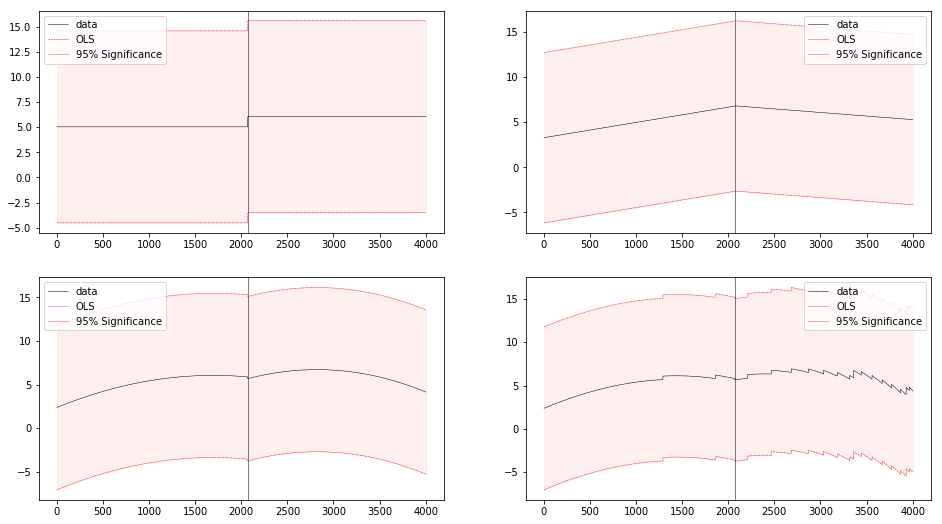

In [38]:

fig = plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
prstd1, iv_l1, iv_u1 = wls_prediction_std(results1)
#plt.plot( ddf['dt1'], ddf['crimes_corruption'], '.',lw=1)
plt.plot(ddf['dt1'],results1.fittedvalues, 'k-', lw=0.5)
plt.plot(ddf['dt1'], iv_u1, 'r----', lw=0.5)
plt.plot( ddf['dt1'],iv_l1, 'r----', lw=0.5)
theta = 2070
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between( ddf['dt1'],iv_u1,iv_l1, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc=2);


plt.subplot(2,2,2)
prstd1, iv_l2, iv_u2 = wls_prediction_std(results2)
#plt.plot(ddf['dt1'], ddf['crimes_corruption'], '.',lw=1)
plt.plot(ddf['dt1'], results2.fittedvalues, 'k-', lw=0.5)
plt.plot(ddf['dt1'], iv_u2, 'r----', lw=0.5)
plt.plot(ddf['dt1'], iv_l2, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between( ddf['dt1'],iv_u2,iv_l2, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');



plt.subplot(2,2,3)
prstd1, iv_l3, iv_u3 = wls_prediction_std(results3)
#plt.plot(ddf['dt1'], ddf['crimes_corruption'], '.',lw=1)
plt.plot(ddf['dt1'], results3.fittedvalues, 'k-', lw=0.5)
plt.plot(ddf['dt1'], iv_u3, 'r----', lw=0.5)
plt.plot(ddf['dt1'], iv_l3, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(ddf['dt1'],iv_u3,iv_l3, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='upper left');

plt.subplot(2,2,4)
prstd1, iv_l4, iv_u4 = wls_prediction_std(results4)
#plt.plot(ddf['dt1'], ddf['crimes_corruption'], '.',lw=1)
plt.plot(ddf['dt1'], results4.fittedvalues, 'k-', lw=0.5)
plt.plot(ddf['dt1'], iv_u4, 'r----', lw=0.5)
plt.plot(ddf['dt1'], iv_l4, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(ddf['dt1'], iv_u4,iv_l4, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');

plt.show()

fig.savefig('emp3.pdf')

## Trying a Double Cut-off on Series

In [30]:

#Setting the date for the Cutt-off

cuttof = 108  #2018 onwards

# creat a dummy with 0 before aug 2013 (69 months) and 1 after #
mdummy1 = []    
for i in (range(1,len(mdf)+1)):
    if 55 > i < cuttof :
        mdummy1.append(0)
    else:
        mdummy1.append(1)
        
mdf['mdummy1'] = mdummy1

mdummy2 = []    
for i in (range(1,len(mdf)+1)):
    if cuttof-1 > i :
        mdummy2.append(0)
    else:
        mdummy2.append(1)
        
mdf['mdummy2'] = mdummy2

# creat a list#
mt1 = list(range(1,len(mdf)+1))  

mdf['mt1'] = mt1

# creat a polynom root after 2013#
mt2= []                  
for i in (range(1,len(mdf)+1)):
    if i < 55:
        mt2.append(0)
    else:
        mt2.append(i-55+1)
        
mdf['mt2'] = mt2

# creat a polynom root after 2013#
mt3= []                  
for i in (range(1,len(mdf)+1)):
    if i < cuttof:
        mt3.append(0)
    else:
        mt3.append(i-cuttof+1)
        
mdf['mt3'] = mt3


#Creating other orther polynomials
        
mdf['ms1'] = np.power(mt1,2)
mdf['mc1'] = np.power(mt1,3)
mdf['ms2'] = np.power(mt2,2)
mdf['mc2'] = np.power(mt2,3)
mdf['ms3'] = np.power(mt2,2)
mdf['mc3'] = np.power(mt2,3)



In [41]:
#  Corruption 
results1 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy1','mdummy2']]).fit()
results2 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy1','mdummy2','mt1','mt2','mt3']]).fit()
results3 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy1','mdummy2','mt1','mt2','mt3','ms1','ms2','ms3']]).fit()
results4 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy1','mdummy2','mt1','mt2','mt3','ms1','ms2','ms3','mc1','mc2','mc3']]).fit()


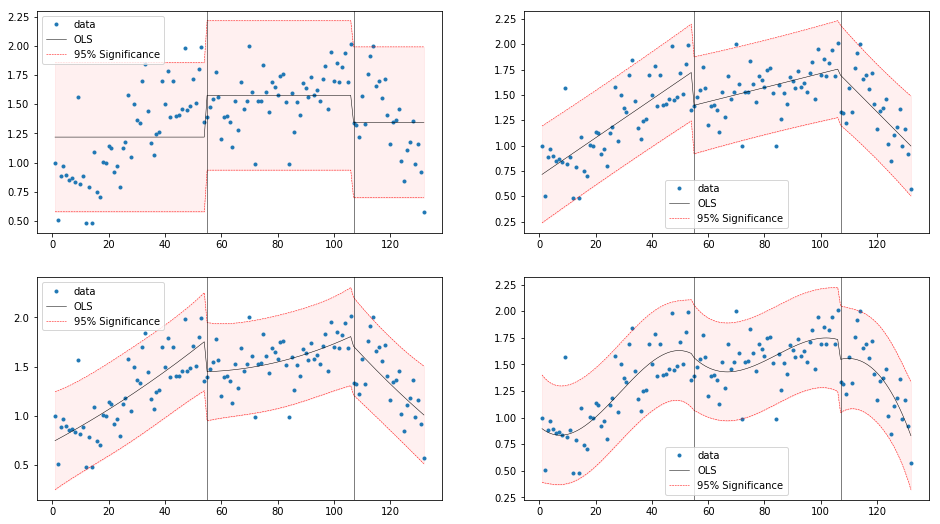

In [42]:

fig = plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
prstd1, iv_l1, iv_u1 = wls_prediction_std(results1)
plt.plot( mdf['mt1'], mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf['mt1'],results1.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1'], iv_u1, 'r----', lw=0.5)
plt.plot( mdf['mt1'],iv_l1, 'r----', lw=0.5)
axv1 = 55
axv2 = cuttof -1 
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
plt.axvline(axv2, color='black', lw=1, alpha=0.5)
plt.fill_between( mdf['mt1'],iv_u1,iv_l1, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc=2);


plt.subplot(2,2,2)
prstd1, iv_l2, iv_u2 = wls_prediction_std(results2)
plt.plot(mdf['mt1'], mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf['mt1'], results2.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1'], iv_u2, 'r----', lw=0.5)
plt.plot(mdf['mt1'], iv_l2, 'r----', lw=0.5)
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
plt.axvline(axv2, color='black', lw=1, alpha=0.5)
plt.fill_between( mdf['mt1'],iv_u2,iv_l2, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');



plt.subplot(2,2,3)
prstd1, iv_l3, iv_u3 = wls_prediction_std(results3)
plt.plot(mdf['mt1'], mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf['mt1'], results3.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1'], iv_u3, 'r----', lw=0.5)
plt.plot(mdf['mt1'], iv_l3, 'r----', lw=0.5)
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
plt.axvline(axv2, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf['mt1'],iv_u3,iv_l3, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='upper left');

plt.subplot(2,2,4)
prstd1, iv_l4, iv_u4 = wls_prediction_std(results4)
plt.plot(mdf['mt1'], mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf['mt1'], results4.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1'], iv_u4, 'r----', lw=0.5)
plt.plot(mdf['mt1'], iv_l4, 'r----', lw=0.5)
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
plt.axvline(axv2, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf['mt1'], iv_u4,iv_l4, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');

plt.show()

fig.savefig('emp3.pdf')

In [43]:
print(results1.summary())
print(results2.summary())
print(results3.summary())
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:      crimes_corruption   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     16.69
Date:                Fri, 28 Feb 2020   Prob (F-statistic):           3.59e-07
Time:                        14:38:03   Log-Likelihood:                -35.744
No. Observations:                 132   AIC:                             77.49
Df Residuals:                     129   BIC:                             86.14
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mcons          1.2190      0.044     27.916      0.0

                            OLS Regression Results                            
Dep. Variable:      crimes_corruption   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     45.03
Date:                Fri, 28 Feb 2020   Prob (F-statistic):           6.17e-20
Time:                        14:38:14   Log-Likelihood:                -3.3763
No. Observations:                 132   AIC:                             14.75
Df Residuals:                     128   BIC:                             26.28
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mcons          0.7591      0.090      8.404      0.0

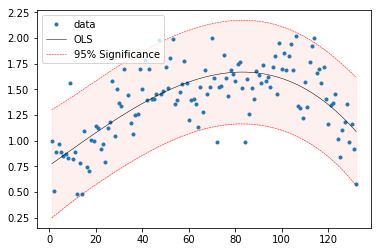

In [44]:
results = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mt1','ms1','mc1']]).fit()
print(results.summary())

prstd1, iv_l, iv_u = wls_prediction_std(results)
plt.plot(mdf['mt1'], mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf['mt1'], results.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1'], iv_u, 'r----', lw=0.5)
plt.plot(mdf['mt1'], iv_l, 'r----', lw=0.5)
#plt.axvline(axv1, color='black', lw=1, alpha=0.5)
#plt.axvline(axv2, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf['mt1'],iv_u,iv_l, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='upper left');

In [45]:
#  Corruption with specific sectioning:
results1 = sm.OLS(mdf['corruption']['2011-01-04':'2019-12-20'], mdf[['mcons','mdummy1','mdummy2']]['2011-01-04':'2019-12-20']).fit()
results2 = sm.OLS(mdf['corruption']['2011-01-04':'2019-12-20'], mdf[['mcons','mdummy1','mdummy2','mt1','mt2','mt3']]['2011-01-04':'2019-12-20']).fit()
results3 = sm.OLS(mdf['corruption']['2011-01-04':'2019-12-20'], mdf[['mcons','mdummy1','mdummy2','mt1','mt2','mt3','ms1','ms2','ms3']]['2011-01-04':'2019-12-20']).fit()
results4 = sm.OLS(mdf['corruption']['2011-01-04':'2019-12-20'], mdf[['mcons','mdummy1','mdummy2','mt1','mt2','mt3','ms1','ms2','ms3','mc1','mc2','mc3']]['2011-01-04':'2019-12-20']).fit()


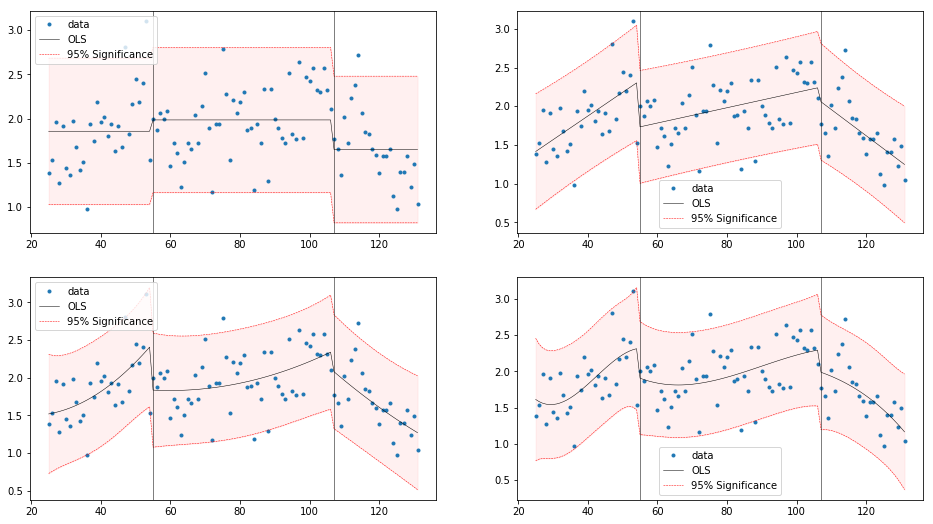

In [46]:

fig = plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
prstd1, iv_l1, iv_u1 = wls_prediction_std(results1)
plt.plot( mdf['mt1']['2011-01-04':'2019-12-20'], mdf['corruption']['2011-01-04':'2019-12-20'], '.',lw=1)
plt.plot(mdf['mt1']['2011-01-04':'2019-12-20'],results1.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1']['2011-01-04':'2019-12-20'], iv_u1, 'r----', lw=0.5)
plt.plot( mdf['mt1']['2011-01-04':'2019-12-20'],iv_l1, 'r----', lw=0.5)
axv1 = 55
axv2 = cuttof - 1 
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
plt.axvline(axv2, color='black', lw=1, alpha=0.5)
plt.fill_between( mdf['mt1']['2011-01-04':'2019-12-20'],iv_u1,iv_l1, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc=2);


plt.subplot(2,2,2)
prstd1, iv_l2, iv_u2 = wls_prediction_std(results2)
plt.plot(mdf['mt1']['2011-01-04':'2019-12-20'], mdf['corruption']['2011-01-04':'2019-12-20'], '.',lw=1)
plt.plot(mdf['mt1']['2011-01-04':'2019-12-20'], results2.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1']['2011-01-04':'2019-12-20'], iv_u2, 'r----', lw=0.5)
plt.plot(mdf['mt1']['2011-01-04':'2019-12-20'], iv_l2, 'r----', lw=0.5)
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
plt.axvline(axv2, color='black', lw=1, alpha=0.5)
plt.fill_between( mdf['mt1']['2011-01-04':'2019-12-20'],iv_u2,iv_l2, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');



plt.subplot(2,2,3)
prstd1, iv_l3, iv_u3 = wls_prediction_std(results3)
plt.plot(mdf['mt1']['2011-01-04':'2019-12-20'], mdf['corruption']['2011-01-04':'2019-12-20'], '.',lw=1)
plt.plot(mdf['mt1']['2011-01-04':'2019-12-20'], results3.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1']['2011-01-04':'2019-12-20'], iv_u3, 'r----', lw=0.5)
plt.plot(mdf['mt1']['2011-01-04':'2019-12-20'], iv_l3, 'r----', lw=0.5)
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
plt.axvline(axv2, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf['mt1']['2011-01-04':'2019-12-20'],iv_u3,iv_l3, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='upper left');

plt.subplot(2,2,4)
prstd1, iv_l4, iv_u4 = wls_prediction_std(results4)
plt.plot(mdf['mt1']['2011-01-04':'2019-12-20'], mdf['corruption']['2011-01-04':'2019-12-20'], '.',lw=1)
plt.plot(mdf['mt1']['2011-01-04':'2019-12-20'], results4.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1']['2011-01-04':'2019-12-20'], iv_u4, 'r----', lw=0.5)
plt.plot(mdf['mt1']['2011-01-04':'2019-12-20'], iv_l4, 'r----', lw=0.5)
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
plt.axvline(axv2, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf['mt1']['2011-01-04':'2019-12-20'], iv_u4,iv_l4, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');

plt.show()

fig.savefig('emp3.pdf')

In [47]:
print(results1.summary())
print(results2.summary())
print(results3.summary())
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:             corruption   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     5.641
Date:                Fri, 28 Feb 2020   Prob (F-statistic):            0.00472
Time:                        14:38:38   Log-Likelihood:                -54.673
No. Observations:                 107   AIC:                             115.3
Df Residuals:                     104   BIC:                             123.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mcons          1.8589      0.075     24.886      0.0

# Multivariable Regressions

Adding, GDP growth, Unemployment rate and onther variables.

Adding state fixed effects.

In [19]:
# CSV dowloaded from 'ipeadata.gov.br' *Fonte: IPEA * Last trim expected
tgdp = pd.read_csv('C:/Users/lucas/OneDrive/Desktop/Thesis/Thesis - General Stuff/Variables and Indexes/GDP.csv')

tgdp = tgdp.rename(columns={ 'PIB - preços de mercado - var. real trim. - (%) - Instituto Brasileiro de Geografia e Estatística- Sistema de Contas Nacionais Trimestrais (IBGE/SCN Trimestral) - SCN104_PIBPMG104': 'gdp'})
tgdp = pd.DataFrame(tgdp)
#dropting uncessary columns
tgdp = tgdp.drop(['Data'],1)

tgdp = tgdp/100
#creating the date column in datetime format:
tgdp['date'] = pd.date_range('1996-01-01','2020-01-01', freq='Q')

#setting a date index:
tgdp = tgdp.set_index('date')



In [20]:

#Arranging the data to fit Multivariate Monthly regression:
# taking average of quarterly growth to monthly observations:
mdf['gdp'] = tgdp['2008-12-01':'2019'].resample('M').sum()

#(Super Ugly Programing)
for i in range(0, len(mdf)-2 , 3):
    mdf['gdp'][i] =  (mdf['gdp'][i + 2])/300 #I could not use the '^' operator to take the root for gemetric averaging the Quarterly data "((mdf['gdp'][i + 2])^(1/3))/100"    
for i in range(1, len(mdf), 3):
    mdf['gdp'][i] =  mdf['gdp'][i-1]   
for i in range(2, len(mdf), 3):
    mdf['gdp'][i] =  mdf['gdp'][i-1]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [21]:
# CSV dowloaded from 'ipeadata.gov.br' IBGE PNAD -CORREC FOR BEFORE 2012 from SEAD
unemployment = pd.read_csv('C:/Users/lucas/OneDrive/Desktop/Thesis/Thesis - General Stuff/Variables and Indexes/unemployment2.csv')

unemployment = unemployment.rename(columns={ 'Taxa de desocupação - (%) - Instituto Brasileiro de Geografia e Estatística- Pesquisa Nacional por Amostra de Domicílios Contínua (IBGE/PNAD Contínua) - PNADC12_TDESOC12': 'unemployment'})
unemployment = pd.DataFrame(unemployment)
#dropting uncessary columns
unemployment = unemployment.drop(['Unnamed: 2','Data'],1)

unemplyment = unemployment/100
#creating the date column in datetime format:
unemployment['date'] = pd.date_range('2009','2020', freq='M')

#setting a date index:
unemployment = unemployment.set_index('date')

mdf['unemployment'] = unemployment['2009':'2020'].resample('M').sum()


In [22]:
# CSV dowloaded from 'ipeadata.gov.br'
interest = pd.read_csv('C:/Users/lucas/OneDrive/Desktop/Thesis/Thesis - General Stuff/Variables and Indexes/interest_rate.csv')

interest = interest.rename(columns={ 'Taxa de juros - Over / Selic - (% a.m.) - Banco Central do Brasil- Boletim- Seção mercado financeiro e de capitais (Bacen/Boletim/M. Finan.) - BM12_TJOVER12': 'interest'})
interest = pd.DataFrame(interest)
#dropting uncessary columns
interest = interest.drop(['Unnamed: 2','Data'],1)
interes = interest/100

#creating the date column in datetime format:
interest['date'] = pd.date_range('1973-12-01','2020-02-01', freq='M')

#setting a date index:
interest = interest.set_index('date')

mdf['interest'] = interest['2009':'2020'].resample('M').sum()

In [23]:
# CSV dowloaded from 'ipeadata.gov.br'
inflation = pd.read_csv('C:/Users/lucas/OneDrive/Desktop/Thesis/Thesis - General Stuff/Variables and Indexes/IPCA.csv')

inflation = inflation.rename(columns={ 'Inflação - IPCA - (% a.m.) - Instituto Brasileiro de Geografia e Estatística- Sistema Nacional de Índices de Preços ao Consumidor (IBGE/SNIPC) - PRECOS12_IPCAG12': 'interest'})
inflation = pd.DataFrame(inflation)
#dropting uncessary columns
inflation = inflation.drop(['Unnamed: 2','Data'],1)
inflation = inflation/100

#creating the date column in datetime format:
inflation['date'] = pd.date_range('1979-12-01','2020-01-01', freq='M')

#setting a date index:
inflation = inflation.set_index('date')

mdf['inflation'] = inflation['2008-12-01':'2019'].resample('M').sum()

In [24]:
mdf['real_interest'] = mdf['inflation']*(mdf['interest']+1)

In [58]:
#mdf.to_csv('C:/IP_DATA/MONTHLY_TREATED.csv')

In [28]:
#regressing

results1 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mt2','ms2','gdp','unemployment','real_interest']]).fit()
results2 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mt2','ms2','mc2','gdp','unemployment','real_interest']]).fit()
results3 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mt2','ms2','mc2','mq2','gdp','unemployment','real_interest']]).fit()
results4 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mt2','ms2','mc2','mq2','mf2','gdp','unemployment','real_interest']]).fit()
results5 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mt2','ms2','mc2','mq2','gdp','unemployment','real_interest','other_crimes']]).fit()
results6 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mt2','ms2','mc2','mq2','mf2','gdp','unemployment','real_interest','other_crimes']]).fit()
stargazer = Stargazer([results1, results2,results3,results4,results5,results6])
stargazer.covariate_order(['mcons','mdummy','gdp','unemployment','real_interest','other_crimes'])
HTML(stargazer.render_html())


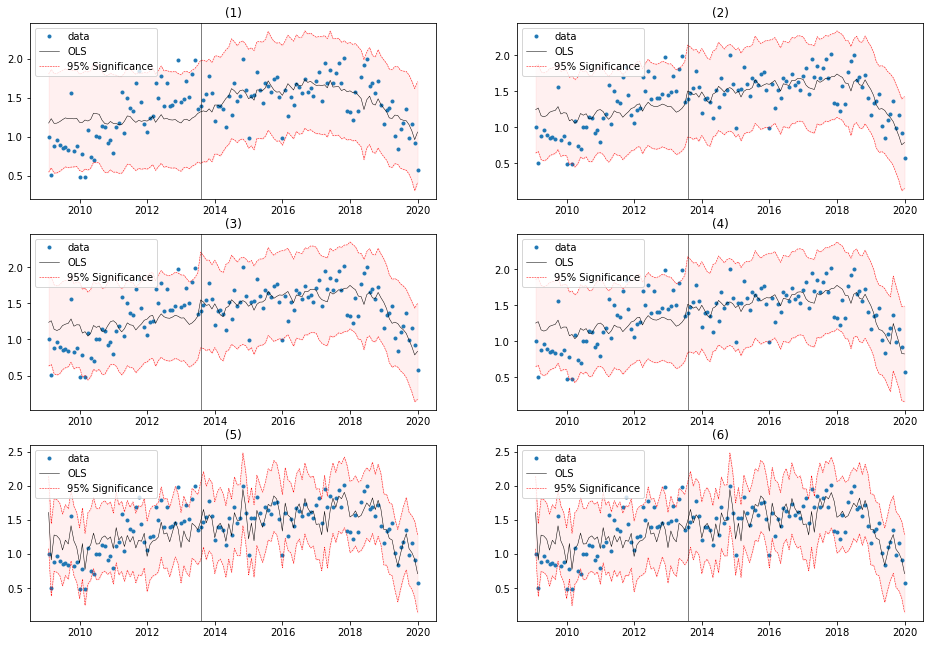

In [29]:

fig = plt.figure(figsize=(16,11))

plt.subplot(3,2,1)
prstd1, iv_l1, iv_u1 = wls_prediction_std(results1)
plt.plot(mdf.index, mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf.index,results1.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf.index, iv_u1, 'r----', lw=0.5)
plt.plot(mdf.index,iv_l1, 'r----', lw=0.5)

theta = '2013-08-01'
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf.index, iv_u1,iv_l1, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc=2);
plt.title('(1)')

plt.subplot(3,2,2)
prstd1, iv_l2, iv_u2 = wls_prediction_std(results2)
plt.plot(mdf.index, mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf.index, results2.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf.index, iv_u2, 'r----', lw=0.5)
plt.plot(mdf.index, iv_l2, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between( mdf.index,iv_u2,iv_l2, color='red', alpha='0.06')
plt.title('(2)')
plt.legend(('data','OLS','95% Significance'),loc=2);



plt.subplot(3,2,3)
prstd1, iv_l3, iv_u3 = wls_prediction_std(results3)
plt.plot(mdf.index, mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf.index, results3.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf.index, iv_u3, 'r----', lw=0.5)
plt.plot(mdf.index, iv_l3, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf.index,iv_u3,iv_l3, color='red', alpha='0.06')
plt.title('(3)')
plt.legend(('data','OLS','95% Significance'),loc=2);

plt.subplot(3,2,4)
prstd1, iv_l4, iv_u4 = wls_prediction_std(results4)
plt.plot(mdf.index, mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf.index, results4.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf.index, iv_u4, 'r----', lw=0.5)
plt.plot(mdf.index, iv_l4, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf.index, iv_u4,iv_l4, color='red', alpha='0.06')
plt.title('(4)')
plt.legend(('data','OLS','95% Significance'),loc=2);


plt.subplot(3,2,5)
prstd1, iv_l5, iv_u5 = wls_prediction_std(results5)
plt.plot(mdf.index, mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf.index, results5.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf.index, iv_u5, 'r----', lw=0.5)
plt.plot(mdf.index, iv_l5, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf.index, iv_u5,iv_l5, color='red', alpha='0.06')
plt.title('(5)')
plt.legend(('data','OLS','95% Significance'),loc=2);

plt.subplot(3,2,6)
prstd1, iv_l6, iv_u6 = wls_prediction_std(results6)
plt.plot(mdf.index, mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf.index, results6.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf.index, iv_u6, 'r----', lw=0.5)
plt.plot(mdf.index, iv_l6, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf.index, iv_u6,iv_l6, color='red', alpha='0.06')
plt.title('(6)')
plt.legend(('data','OLS','95% Significance'),loc=2);



plt.show()

fig.savefig('dis1.pdf')

In [31]:
#regressing

results1 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy']]).fit()
results2 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','gdp','unemployment','real_interest']]).fit()
results3 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mdummy2']]).fit()
results4 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mdummy2','gdp','unemployment','real_interest']]).fit()
results5 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mdummy2','mt1']]).fit()
results6 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mdummy2','mt1','gdp','unemployment','real_interest']]).fit()
stargazer = Stargazer([results1, results2,results3,results4,results5,results6])
stargazer.covariate_order(['mcons','mdummy','mt1','gdp','unemployment','mdummy2','real_interest'])
HTML(stargazer.render_html())


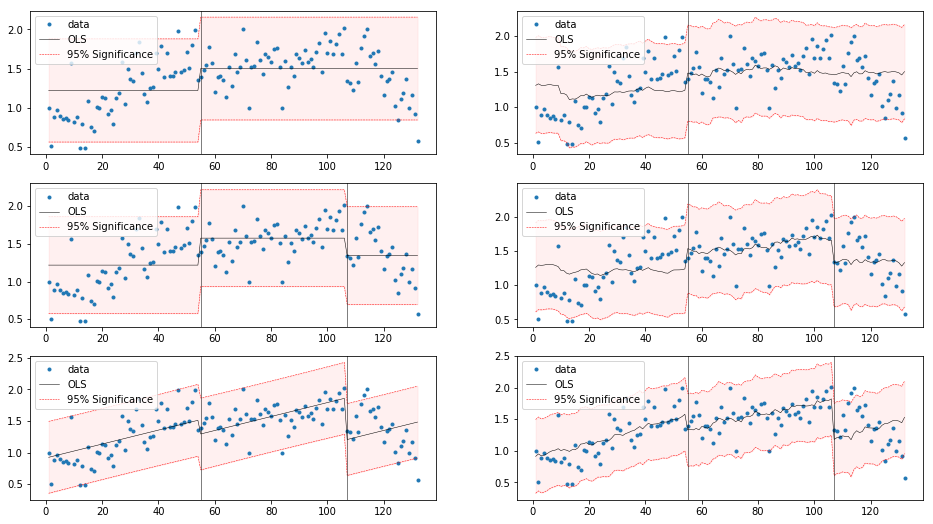

In [60]:
fig = plt.figure(figsize=(16,9))

plt.subplot(3,2,1)
prstd1, iv_l1, iv_u1 = wls_prediction_std(results1)
plt.plot( mdf['mt1'],mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf['mt1'],results1.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1'],iv_u1, 'r----', lw=0.5)
plt.plot( mdf['mt1'],iv_l1, 'r----', lw=0.5)

axv2 = cuttof - 1 
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
#plt.axvline(axv2, color='black', lw=1, alpha=0.5)
plt.fill_between( mdf['mt1'],iv_u1,iv_l1, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc=2);


plt.subplot(3,2,2)
prstd1, iv_l2, iv_u2 = wls_prediction_std(results2)
plt.plot(mdf['mt1'], mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf['mt1'], results2.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1'], iv_u2, 'r----', lw=0.5)
plt.plot(mdf['mt1'], iv_l2, 'r----', lw=0.5)
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
#plt.axvline(axv2, color='black', lw=1, alpha=0.5)
plt.fill_between( mdf['mt1'],iv_u2,iv_l2, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');



plt.subplot(3,2,3)
prstd1, iv_l3, iv_u3 = wls_prediction_std(results3)
plt.plot(mdf['mt1'], mdf['crimes_corruption'],'.',lw=1)
plt.plot(mdf['mt1'], results3.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1'], iv_u3, 'r----', lw=0.5)
plt.plot(mdf['mt1'], iv_l3, 'r----', lw=0.5)
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
plt.axvline(axv2, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf['mt1'],iv_u3,iv_l3, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='upper left');

plt.subplot(3,2,4)
prstd1, iv_l4, iv_u4 = wls_prediction_std(results4)
plt.plot(mdf['mt1'], mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf['mt1'], results4.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1'], iv_u4, 'r----', lw=0.5)
plt.plot(mdf['mt1'], iv_l4, 'r----', lw=0.5)
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
plt.axvline(axv2, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf['mt1'], iv_u4,iv_l4, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');


plt.subplot(3,2,5)
prstd1, iv_l5, iv_u5 = wls_prediction_std(results5)
plt.plot(mdf['mt1'], mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf['mt1'], results5.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1'], iv_u5, 'r----', lw=0.5)
plt.plot(mdf['mt1'], iv_l5, 'r----', lw=0.5)
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
plt.axvline(axv2, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf['mt1'], iv_u5,iv_l5, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');


plt.subplot(3,2,6)
prstd1, iv_l6, iv_u6 = wls_prediction_std(results6)
plt.plot(mdf['mt1'], mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf['mt1'], results6.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1'], iv_u6, 'r----', lw=0.5)
plt.plot(mdf['mt1'], iv_l6, 'r----', lw=0.5)
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
plt.axvline(axv2, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf['mt1'], iv_u6,iv_l6, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');



plt.show()

fig.savefig('emp3.pdf')

In [61]:
#regressing

results1b = sm.OLS(mdf['other_crimes'], mdf[['mcons','mdummy']]).fit()
results2b = sm.OLS(mdf['other_crimes'], mdf[['mcons','mdummy','gdp','unemployment','real_interest']]).fit()
results3b = sm.OLS(mdf['other_crimes'], mdf[['mcons','mdummy1','mdummy2']]).fit()
results4b = sm.OLS(mdf['other_crimes'], mdf[['mcons','mdummy1','mdummy2','gdp','unemployment','real_interest']]).fit()
results5b = sm.OLS(mdf['other_crimes'], mdf[['mcons','mdummy1','mdummy2','mt1']]).fit()
results6b = sm.OLS(mdf['other_crimes'], mdf[['mcons','mdummy1','mdummy2','mt1','gdp','unemployment','real_interest']]).fit()
stargazer = Stargazer([results1b, results2b,results3b,results4b,results5b,results6b])
stargazer.covariate_order(['mcons','mdummy','mt1','gdp','unemployment','mdummy1','mdummy2','real_interest'])
HTML(stargazer.render_html())


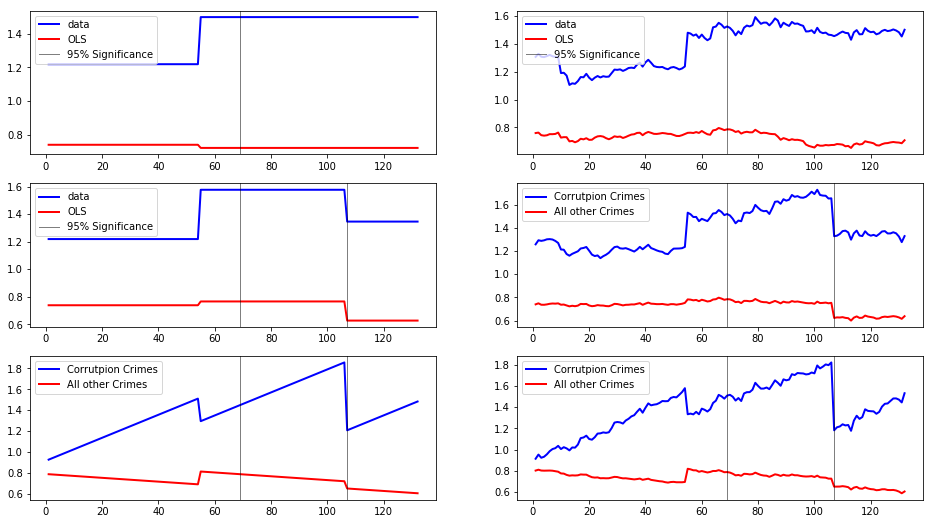

In [62]:
fig = plt.figure(figsize=(16,9))

plt.subplot(3,2,1)
prstd1, iv_l1, iv_u1 = wls_prediction_std(results1)
#plt.plot( mdf['mt1']['2008-12-04':'2019-04-01'],mdf['crimes_corruption']['2008-12-04':'2019-04-01'], '.',lw=1)
#plt.plot( mdf['mt1']['2008-12-04':'2019-04-01'],mdf['theft']['2008-12-04':'2019-04-01'], '.',lw=1)
plt.plot(mdf['mt1'],results1.fittedvalues, 'b-', lw=2)
plt.plot(mdf['mt1'],results1b.fittedvalues, 'r-', lw=2)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'],iv_u1, 'r----', lw=0.5)
#plt.plot( mdf['mt1']['2008-12-04':'2019-04-01'],iv_l1, 'r----', lw=0.5)
axv1 = 69
axv2 = cuttof - 1 
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
#plt.axvline(axv2, color='black', lw=1, alpha=0.5)
#plt.fill_between( mdf['mt1']['2008-12-04':'2019-04-01'],iv_u1,iv_l1, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc='upper left');


plt.subplot(3,2,2)
prstd1, iv_l2, iv_u2 = wls_prediction_std(results2)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], mdf['crimes_corruption']['2008-12-04':'2019-04-01'], '.',lw=1)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], mdf['theft']['2008-12-04':'2019-04-01'], '.',lw=1)
plt.plot(mdf['mt1'], results2.fittedvalues, 'b-', lw=2)
plt.plot(mdf['mt1'], results2b.fittedvalues, 'r-', lw=2)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], iv_u2, 'r----', lw=0.5)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], iv_l2, 'r----', lw=0.5)
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
#plt.axvline(axv2, color='black', lw=1, alpha=0.5)
#plt.fill_between( mdf['mt1']['2008-12-04':'2019-04-01'],iv_u2,iv_l2, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='upper left');



plt.subplot(3,2,3)
prstd1, iv_l3, iv_u3 = wls_prediction_std(results3)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], mdf['crimes_corruption']['2008-12-04':'2019-04-01'],'.',lw=1)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], mdf['theft']['2008-12-04':'2019-04-01'], '.',lw=1)
plt.plot(mdf['mt1'], results3.fittedvalues, 'b-', lw=2)
plt.plot(mdf['mt1'], results3b.fittedvalues, 'r-', lw=2)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], iv_u3, 'r----', lw=0.5)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], iv_l3, 'r----', lw=0.5)
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
plt.axvline(axv2, color='black', lw=1, alpha=0.5)
#plt.fill_between(mdf['mt1']['2008-12-04':'2019-04-01'],iv_u3,iv_l3, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='upper left');

plt.subplot(3,2,4)

#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], mdf['crimes_corruption']['2008-12-04':'2019-04-01'], '.',lw=1)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], mdf['theft']['2008-12-04':'2019-04-01'], '.',lw=1)
plt.plot(mdf['mt1'], results4.fittedvalues, 'b-', lw=2)
plt.plot(mdf['mt1'], results4b.fittedvalues, 'r-', lw=2)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], iv_u4, 'r----', lw=0.5)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], iv_l4, 'r----', lw=0.5)
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
plt.axvline(axv2, color='black', lw=1, alpha=0.5)
#plt.fill_between(mdf['mt1']['2008-12-04':'2019-04-01'], iv_u4,iv_l4, color='red', alpha='0.06')

plt.legend(('Corrutpion Crimes','All other Crimes'),loc='upper left');




plt.subplot(3,2,5)

#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], mdf['crimes_corruption']['2008-12-04':'2019-04-01'], '.',lw=1)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], mdf['theft']['2008-12-04':'2019-04-01'], '.',lw=1)
plt.plot(mdf['mt1'], results5.fittedvalues, 'b-', lw=2)
plt.plot(mdf['mt1'], results5b.fittedvalues, 'r-', lw=2)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], iv_u4, 'r----', lw=0.5)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], iv_l4, 'r----', lw=0.5)
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
plt.axvline(axv2, color='black', lw=1, alpha=0.5)
#plt.fill_between(mdf['mt1']['2008-12-04':'2019-04-01'], iv_u4,iv_l4, color='red', alpha='0.06')

plt.legend(('Corrutpion Crimes','All other Crimes'),loc='upper left');




plt.subplot(3,2,6)

#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], mdf['crimes_corruption']['2008-12-04':'2019-04-01'], '.',lw=1)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], mdf['theft']['2008-12-04':'2019-04-01'], '.',lw=1)
plt.plot(mdf['mt1'], results6.fittedvalues, 'b-', lw=2)
plt.plot(mdf['mt1'], results6b.fittedvalues, 'r-', lw=2)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], iv_u4, 'r----', lw=0.5)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], iv_l4, 'r----', lw=0.5)
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
plt.axvline(axv2, color='black', lw=1, alpha=0.5)
#plt.fill_between(mdf['mt1']['2008-12-04':'2019-04-01'], iv_u4,iv_l4, color='red', alpha='0.06')

plt.legend(('Corrutpion Crimes','All other Crimes'),loc='upper left');


plt.show()

fig.savefig('emp3.pdf')

In [63]:

#regressing

results1b = sm.OLS((mdf['offences']/(mdf['offences'][0])), mdf[['mcons','mdummy']]).fit()
results2b = sm.OLS((mdf['offences']/(mdf['offences'][0])), mdf[['mcons','mdummy','mt1','crimes_corruption','gdp','unemployment','interest']]).fit()
results3b = sm.OLS((mdf['offences']/(mdf['offences'][0])), mdf[['mcons','mdummy1','mdummy2']]).fit()
results4b = sm.OLS((mdf['offences']/(mdf['offences'][0])), mdf[['mcons','mdummy1','mdummy2','mt1','crimes_corruption','gdp','unemployment','interest']]).fit()

stargazer = Stargazer([results1b, results2b,results3b,results4b])
stargazer.covariate_order(['mcons','mdummy','gdp','unemployment','mdummy1','mdummy2','interest','mt1','crimes_corruption',])
HTML(stargazer.render_html())


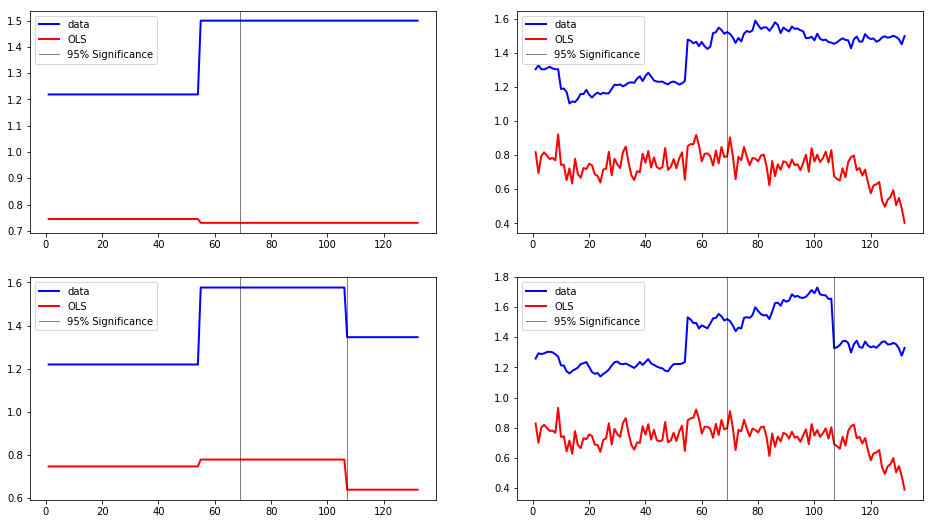

In [64]:
fig = plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
prstd1, iv_l1, iv_u1 = wls_prediction_std(results1)
#plt.plot( mdf['mt1']['2008-12-04':'2019-04-01'],mdf['crimes_corruption']['2008-12-04':'2019-04-01'], '.',lw=1)
#plt.plot( mdf['mt1']['2008-12-04':'2019-04-01'],mdf['theft']['2008-12-04':'2019-04-01'], '.',lw=1)
plt.plot(mdf['mt1'],results1.fittedvalues, 'b-', lw=2)
plt.plot(mdf['mt1'],results1b.fittedvalues, 'r-', lw=2)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'],iv_u1, 'r----', lw=0.5)
#plt.plot( mdf['mt1']['2008-12-04':'2019-04-01'],iv_l1, 'r----', lw=0.5)
axv1 = 69
axv2 = cuttof - 1 
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
#plt.axvline(axv2, color='black', lw=1, alpha=0.5)
#plt.fill_between( mdf['mt1']['2008-12-04':'2019-04-01'],iv_u1,iv_l1, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc=2);


plt.subplot(2,2,2)
prstd1, iv_l2, iv_u2 = wls_prediction_std(results2)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], mdf['crimes_corruption']['2008-12-04':'2019-04-01'], '.',lw=1)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], mdf['theft']['2008-12-04':'2019-04-01'], '.',lw=1)
plt.plot(mdf['mt1'], results2.fittedvalues, 'b-', lw=2)
plt.plot(mdf['mt1'], results2b.fittedvalues, 'r-', lw=2)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], iv_u2, 'r----', lw=0.5)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], iv_l2, 'r----', lw=0.5)
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
#plt.axvline(axv2, color='black', lw=1, alpha=0.5)
#plt.fill_between( mdf['mt1']['2008-12-04':'2019-04-01'],iv_u2,iv_l2, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');



plt.subplot(2,2,3)
prstd1, iv_l3, iv_u3 = wls_prediction_std(results3)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], mdf['crimes_corruption']['2008-12-04':'2019-04-01'],'.',lw=1)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], mdf['theft']['2008-12-04':'2019-04-01'], '.',lw=1)
plt.plot(mdf['mt1'], results3.fittedvalues, 'b-', lw=2)
plt.plot(mdf['mt1'], results3b.fittedvalues, 'r-', lw=2)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], iv_u3, 'r----', lw=0.5)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], iv_l3, 'r----', lw=0.5)
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
plt.axvline(axv2, color='black', lw=1, alpha=0.5)
#plt.fill_between(mdf['mt1']['2008-12-04':'2019-04-01'],iv_u3,iv_l3, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='upper left');

plt.subplot(2,2,4)
prstd1, iv_l4, iv_u4 = wls_prediction_std(results4)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], mdf['crimes_corruption']['2008-12-04':'2019-04-01'], '.',lw=1)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], mdf['theft']['2008-12-04':'2019-04-01'], '.',lw=1)
plt.plot(mdf['mt1'], results4.fittedvalues, 'b-', lw=2)
plt.plot(mdf['mt1'], results4b.fittedvalues, 'r-', lw=2)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], iv_u4, 'r----', lw=0.5)
#plt.plot(mdf['mt1']['2008-12-04':'2019-04-01'], iv_l4, 'r----', lw=0.5)
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
plt.axvline(axv2, color='black', lw=1, alpha=0.5)
#plt.fill_between(mdf['mt1']['2008-12-04':'2019-04-01'], iv_u4,iv_l4, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');

plt.show()

fig.savefig('emp3.pdf')

In [65]:
##ANUAL QLR
##Quandit Likehood Test : Look for every significant break in the series.

QLR_p = []
QLR_e = []
QLR_resid = []
# creat a dummy for every period and run an OLS keeping the values and std errors from each dummy
  

for j in (range(1,len(ydf)+1)):
    ydummy = []      
    for i in (range(1,len(ydf)+1)):
        if i < j:
            ydummy.append(0)
        else:
            ydummy.append(1)
    ydf['ydummy_' + str(j)] = ydummy
    x = sm.OLS(ydf['crimes_corruption'], ydf[['ycons','ydummy_' + str(j)]]).fit()
    QLR_p.append(np.array(x.params)[1])
    QLR_e.append(np.array(x.bse)[1])
    QLR_resid.append(np.array(x.resid))

#Creating series for plotting
    
QLR_p = pd.Series(QLR_p)
QLR_e = pd.Series(QLR_e)
QLR_eu =  QLR_p.add(1.96*QLR_e, fill_value=0)
QLR_ed =  QLR_p.add(-1.96*QLR_e, fill_value=0)


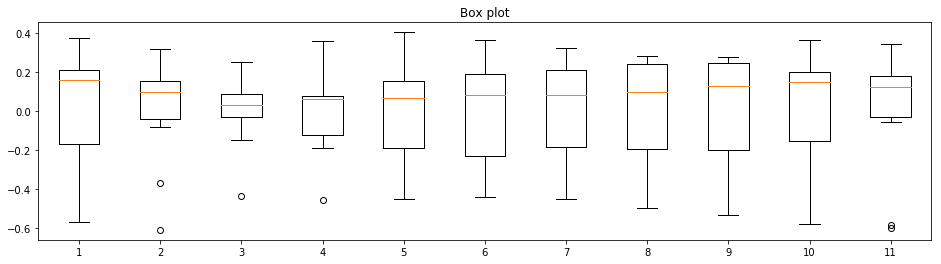

In [66]:
# plot violin plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 4))
#axes.violinplot(QLR_resid,
#                   showmeans=False,
#                   showmedians=True)
#axes.set_title('Violin plot')

# plot box plot
axes.boxplot(QLR_resid)
axes.set_title('Box plot')

# adding horizontal grid lines
#for ax in axes:
#    ax.yaxis.grid(True)
#    ax.set_xticks([y + 1 for y in range(len(QLR_resid))])
#    ax.set_xlabel('Four separate samples')
#    ax.set_ylabel('Observed values')

# add x-tick labels
#plt.setp(axes, xticks=[y + 1 for y in range(len(QLR_resid))])
plt.show()

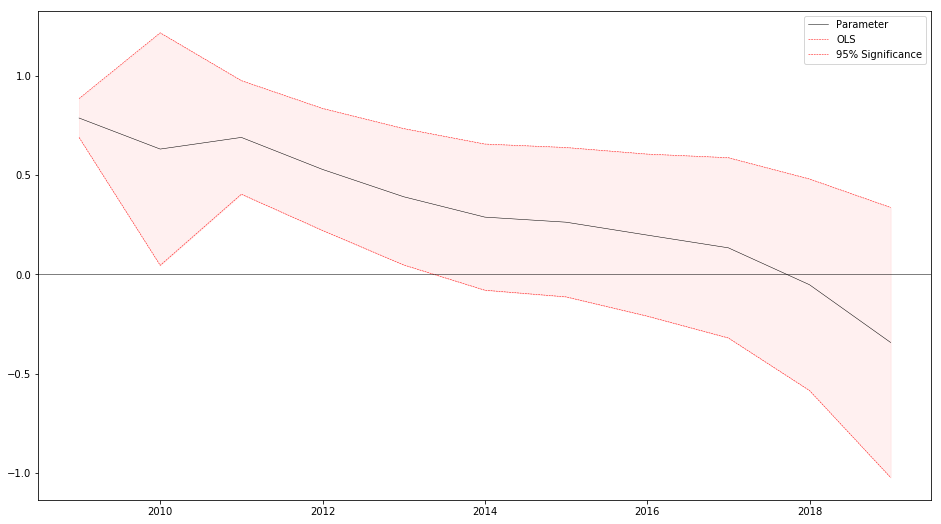

In [67]:
fig = plt.figure(figsize=(16,9))

plt.plot((range(2009,2020,1)), QLR_p, 'k-', lw=0.5)
plt.plot((range(2009,2020,1)), QLR_eu, 'r--', lw=0.5)
plt.plot((range(2009,2020,1)), QLR_ed, 'r--', lw=0.5)
#plt.axvline(axv1, color='black', lw=1, alpha=0.5)
plt.axhline(0, color='black', lw=1, alpha=0.5)
plt.fill_between((range(2009,2020,1)),QLR_eu, QLR_ed, color='red', alpha='0.06')

plt.legend(('Parameter','OLS','95% Significance'),loc='best');

plt.show()

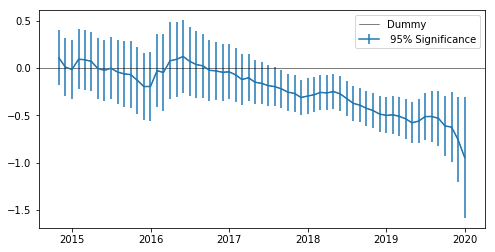

In [69]:
##ANUAL QLR
##Quandit Likehood Test : Look for every significant break in the series.

QLR_p = []
QLR_e = []
QLR_resid = []
# creat a dummy for every period and run an OLS keeping the values and std errors from each dummy
  

for j in (range(1,len(mdf)+1)):
    mdummy = []      
    for i in (range(1,len(mdf)+1)):
        if i < j:
            mdummy.append(0)
        else:
            mdummy.append(1)
    mdf['mdummy_' + str(j)] = mdummy
    x = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mdummy_' + str(j),'gdp','unemployment','real_interest']]).fit()
    QLR_p.append(np.array(x.params)[2])
    QLR_e.append(np.array(x.bse)[2])
    QLR_resid.append(np.array(x.resid))

#Creating series for plotting
    
QLR_p = pd.Series(QLR_p)
QLR_e = pd.Series(QLR_e)
QLR_eu =  QLR_p.add(1.96*QLR_e, fill_value=0)
QLR_ed =  QLR_p.add(-1.96*QLR_e, fill_value=0)


fig = plt.figure(figsize=(8,4))

plt.plot(mdf.index[69:132], QLR_p[69:132],'k', lw=0.5)
#plt.plot(mdf['mt1'], QLR_eu, 'r--', lw=0.5)
#plt.plot(mdf['mt1'], QLR_ed, 'r--', lw=0.5)
plt.errorbar(mdf.index[69:132], QLR_p[69:132], yerr=(QLR_e[69:132]*1.96))
#plt.axvline(axv1, color='black', lw=1, alpha=0.5)

#plt.fill_between(mdf['mt1'],QLR_eu, QLR_ed, color='red', alpha='0.06')

plt.legend(('Dummy',' 95% Significance'),loc='best');
plt.axhline(0, color='black', lw=1, alpha=0.5)
plt.show()
fig.savefig('QLR.pdf')

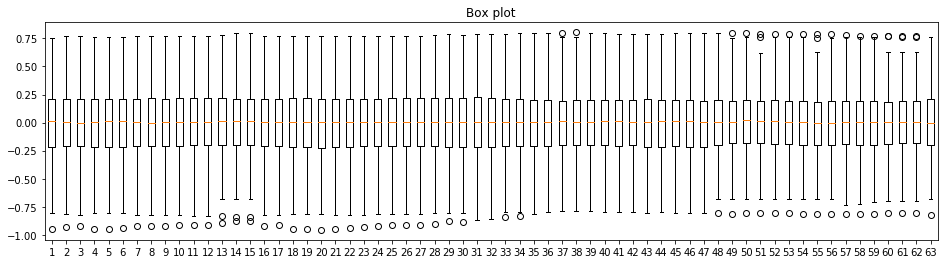

In [70]:
# plot violin plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 4))
#axes.violinplot(QLR_resid,
#                   showmeans=False,
#                   showmedians=True)
#axes.set_title('Violin plot')

# plot box plot
axes.boxplot(QLR_resid[69:132])
axes.set_title('Box plot')

# adding horizontal grid lines
#for ax in axes:
#    ax.yaxis.grid(True)
#    ax.set_xticks([y + 1 for y in range(len(QLR_resid))])
#    ax.set_xlabel('Four separate samples')
#    ax.set_ylabel('Observed values')

# add x-tick labels
#plt.setp(axes, xticks=[y + 1 for y in range(len(QLR_resid))])
plt.show()

In [71]:
#regressing using other crimes as dependent variable

results1 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy1','mdummy2','mt1','mt2','mt3','ms1','ms2','ms3','mc1','mc2','mc3' ,'gdp','unemployment','real_interest','other_crimes']]).fit()
results2 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','gdp','unemployment','real_interest','other_crimes']]).fit()
results3 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy1','mdummy2']]).fit()
results4 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy1','mdummy2','gdp','unemployment','real_interest','other_crimes']]).fit()

stargazer = Stargazer([results1, results2,results3,results4])
stargazer.covariate_order(['mcons','mdummy','gdp','unemployment','mdummy1','mdummy2','real_interest','other_crimes'])
HTML(stargazer.render_html())


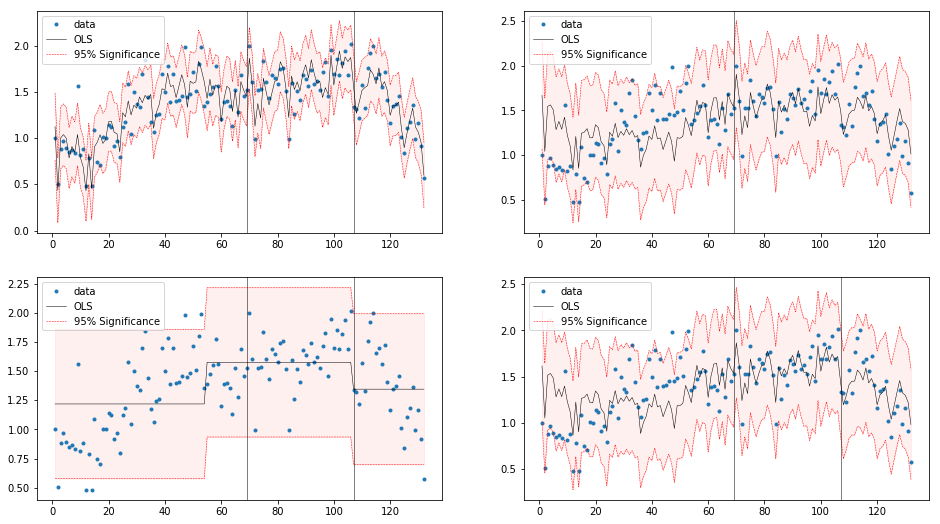

In [72]:
fig = plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
prstd1, iv_l1, iv_u1 = wls_prediction_std(results1)
plt.plot( mdf['mt1'],mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf['mt1'],results1.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1'],iv_u1, 'r----', lw=0.5)
plt.plot( mdf['mt1'],iv_l1, 'r----', lw=0.5)
axv1 = 69
axv2 = cuttof - 1 
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
plt.axvline(axv2, color='black', lw=1, alpha=0.5)
plt.fill_between( mdf['mt1'],iv_u1,iv_l1, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc=2);



plt.subplot(2,2,2)
prstd1, iv_l2, iv_u2 = wls_prediction_std(results2)
plt.plot(mdf['mt1'], mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf['mt1'], results2.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1'], iv_u2, 'r----', lw=0.5)
plt.plot(mdf['mt1'], iv_l2, 'r----', lw=0.5)
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
#plt.axvline(axv2, color='black', lw=1, alpha=0.5)
plt.fill_between( mdf['mt1'],iv_u2,iv_l2, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');



plt.subplot(2,2,3)
prstd1, iv_l3, iv_u3 = wls_prediction_std(results3)
plt.plot(mdf['mt1'], mdf['crimes_corruption'],'.',lw=1)
plt.plot(mdf['mt1'], results3.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1'], iv_u3, 'r----', lw=0.5)
plt.plot(mdf['mt1'], iv_l3, 'r----', lw=0.5)
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
plt.axvline(axv2, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf['mt1'],iv_u3,iv_l3, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='upper left');

plt.subplot(2,2,4)
prstd1, iv_l4, iv_u4 = wls_prediction_std(results4)
plt.plot(mdf['mt1'], mdf['crimes_corruption'], '.',lw=1)
plt.plot(mdf['mt1'], results4.fittedvalues, 'k-', lw=0.5)
plt.plot(mdf['mt1'], iv_u4, 'r----', lw=0.5)
plt.plot(mdf['mt1'], iv_l4, 'r----', lw=0.5)
plt.axvline(axv1, color='black', lw=1, alpha=0.5)
plt.axvline(axv2, color='black', lw=1, alpha=0.5)
plt.fill_between(mdf['mt1'], iv_u4,iv_l4, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');

plt.show()

fig.savefig('emp3.pdf')

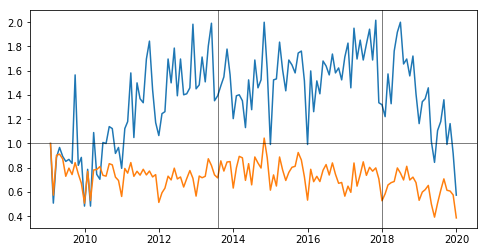

In [83]:
#Parallel pre-treatmen trend assumption
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

ax.plot(mdf[['crimes_corruption','other_crimes']])
ax.axvline('2013-08-01', color='black', lw=1, alpha=0.5)
ax.axvline('2018-01-01', color='black', lw=1, alpha=0.5)
ax.axhline(1, color='black', lw=1, alpha=0.5)

#ax[1].plot(crimes_corruption['2009':'2019'].resample('M').title.count() )
#ax[1].plot(df['offences'].resample('M').count() - crimes_corruption['2009':'2019'].resample('M').title.count() )
#ax[1].axvline('2013-08-01', color='black', lw=1, alpha=0.5)
#ax[1].axvline('2018-08-01', color='black', lw=1, alpha=0.5)
#ax[1].axhline(1, color='black', lw=1, alpha=0.5)
fig.savefig('diff.pdf')

In [73]:
#Search for a good counterfactuals:
results2 = sm.OLS(mdf['crimes_corruption']['2009':'2013-08-06'], mdf[['mcons','gdp','unemployment','real_interest','other_crimes']]['2009':'2013-08-06']).fit()
stargazer = Stargazer([results1])

results1 = sm.OLS(mdf['crimes_corruption']['2009':'2018-08-06'], mdf[['mcons','gdp','unemployment','real_interest','other_crimes']]['2009':'2018-08-06']).fit()
stargazer = Stargazer([results1,results2])

results3 = sm.OLS(mdf['crimes_corruption']['2013-08-06':'2018-08-06'], mdf[['mcons','gdp','unemployment','real_interest','other_crimes']]['2013-08-06':'2018-08-06']).fit()
stargazer = Stargazer([results2,results1,results3])


stargazer.covariate_order(['mcons','gdp','unemployment','real_interest','other_crimes'])
HTML(stargazer.render_html())



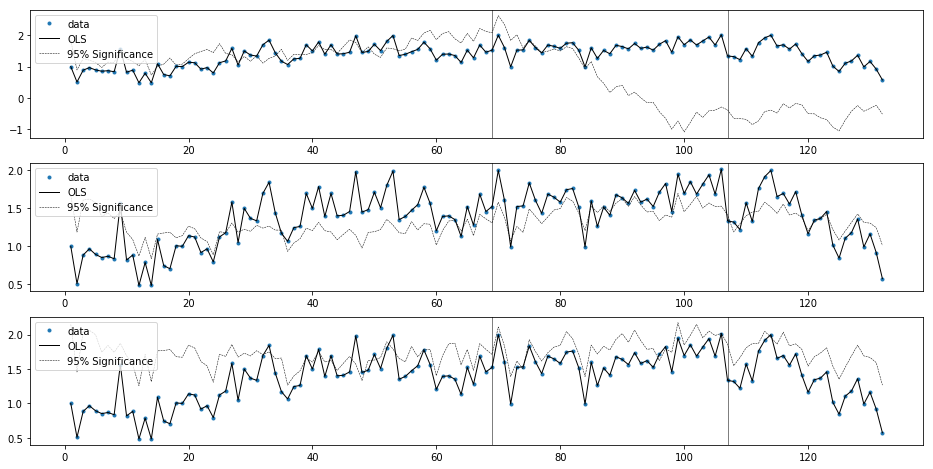

In [66]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 8))


forecast2 = results2.params[0] + results2.params[1]*mdf['gdp'] + results2.params[4]*mdf['other_crimes'] +results2.params[2]*mdf['unemployment']
ax[0].plot( mdf['mt1'],mdf['crimes_corruption'], '.',lw=1)
ax[0].plot( mdf['mt1'],mdf['crimes_corruption'], 'k-',lw=1)
ax[0].plot(mdf['mt1'],forecast2, 'k--', lw=0.5)
axv1 = 69
axv2 = cuttof - 1 
ax[0].axvline(axv1, color='black', lw=1, alpha=0.5)
ax[0].axvline(axv2, color='black', lw=1, alpha=0.5)
ax[0].legend(('data','OLS','95% Significance'),loc=2);



forecast1 =  results1.params[1]*mdf['gdp'] + results1.params[4]*mdf['other_crimes'] +results1.params[2]*mdf['unemployment'] 

ax[1].plot( mdf['mt1'],mdf['crimes_corruption'], '.',lw=1)
ax[1].plot( mdf['mt1'],mdf['crimes_corruption'], 'k-',lw=1)
ax[1].plot(mdf['mt1'],forecast1, 'k--', lw=0.5)
ax[1].axvline(axv1, color='black', lw=1, alpha=0.5)
ax[1].axvline(axv2, color='black', lw=1, alpha=0.5)
ax[1].legend(('data','OLS','95% Significance'),loc=2);


forecast3 = results3.params[4]*mdf['other_crimes'] +results3.params[2]*mdf['unemployment']

prstd1, iv_l4, iv_u4 = wls_prediction_std(results3)
ax[2].plot( mdf['mt1'],mdf['crimes_corruption'], '.',lw=1)
ax[2].plot( mdf['mt1'],mdf['crimes_corruption'], 'k-',lw=1)
ax[2].plot(mdf['mt1'],forecast3, 'k--', lw=0.5)
ax[2].axvline(axv1, color='black', lw=1, alpha=0.5)
ax[2].axvline(axv2, color='black', lw=1, alpha=0.5)
ax[2].legend(('data','OLS','95% Significance'),loc=2);
#ax[2].axvline(axv1, color='black', lw=1, alpha=0.5)
#ax[2].axvline(axv2, color='black', lw=1, alpha=0.5)
#ax[2].fill_between(mdf['mt1'], iv_u4,iv_l4, color='red', alpha='0.06')



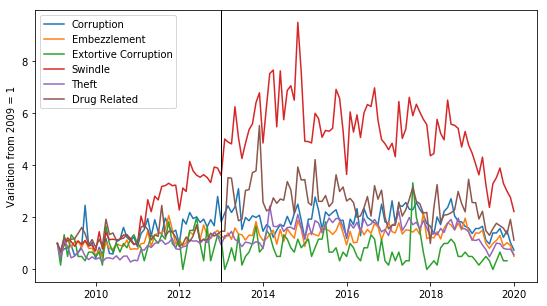

In [75]:
fig, ax = plt.subplots(figsize=(9,5))


ax.set(ylabel='Variation from 2009 = 1')
for i in ['corruption', 'embezzlement', 'extortive_corruption','swindle','theft', 'drugs_related']:
    ax.plot(mdf[i])
ax.axvline('2013', color='black', lw=1, alpha=1)    
ax.legend(['Corruption', 'Embezzlement', 'Extortive Corruption','Swindle','Theft', 'Drug Related'],loc=2)
plt.show()
fig.savefig('crimes.pdf')

In [76]:
#Yearly Variables
#Creating the yearly dataframe 
ydf = df['2009':'2019'].resample('Y').count()


#In the absence of a better solution to unstring the variables:
scrimes = ['corruption', 'embezzlement', 'environmental',' desobedience', 'extortive_corruption','swindle','theft',
          'drugs_related', 'against_property', 'finance_related',' currency_falsification',' fake_id', 'gun_restrictions',
          'authority_abuse', 'procurement_fraud', 'crimes_corruption','other_crimes']
crimes = [corruption, embezzlement, environmental, desobedience, extortive_corruption,swindle,theft,
          drugs_related, against_property, finance_related, currency_falsification, fake_id, gun_restrictions,
          authority_abuse, procurement_fraud, crimes_corruption, other_crimes]


for i , j  in zip(crimes, scrimes):
    ydf[j] = i.resample('Y').title.count()

In [71]:
from IPython.core.display import HTML
HTML(ydf[['offences','corruption','embezzlement','environmental','extortive_corruption','swindle','theft','drugs_related','against_property','finance_related','authority_abuse','procurement_fraud']].to_latex())